## HMI File downloading and resizing code

In [1]:
import drms #pip install drms, astropy, sunpy , skvideo
import numpy as np
import astropy.units as u
import shutil
import os
import datetime
import matplotlib.pyplot as plt
import skvideo.io
from astropy.io import fits
from matplotlib.pyplot import imshow
from PIL import Image
from sunpy.map import Map
from datetime import date, time, datetime, timedelta
workdir = 'C:/Users/alexf/Desktop/HMI_Data/'
fits_dir = workdir + 'fits/'
if not os.path.exists(workdir):
    os.mkdir(workdir)
    print("Directory " + workdir + "does not exist. Creating...")

# HMI fits file downloading
Warning: Running this code will delete all currently saved fits files

In [2]:
start = datetime(2010,6,21,11,0,0)#date time object format is year, month, day, hour, minute, second
end = datetime(2011,5,1,0,0,0)
time_interval = timedelta(minutes = 60) #timedelta will accept weeks,days,hours,minutes and seconds as input
chunk_size = 480 #chunk size is the number of hmi files downloaded in each export call. must be at least 1
export_protocol = 'fits'#using as-is instead of fits will result in important metadata not being downloaded
email = 'hsmgroupnasa@gmail.com'#use a group email
series = 'hmi.M_720s'

In [3]:
if (end < start):
    print("The end date is before the start date. Please select an end date after the start date")
    #sys.exit()
if not os.path.exists(fits_dir):
    os.mkdir(fits_dir)
    print("Directory " + fits_dir + "does not exist. Creating...")
    
c = drms.Client(email=email, verbose = True) 
total = (end-start) // time_interval + 1
print('Downloading ' + str(total) + ' files')
missing_files = []
def download(start,end,chunk_size,time_interval):
    current_time = start
    while(current_time<end):
        if (end-current_time > (time_interval * chunk_size)):
            time_chunk = (time_interval * chunk_size)
        else:
            time_chunk = end-current_time
        end_time = current_time + time_chunk
        current_timestring = current_time.strftime('%Y' + '.' + '%m' + '.'+'%d'+'_'+'%X') + '_UT'
        end_timestring = end_time.strftime('%Y' + '.' + '%m' + '.'+'%d'+'_'+'%X') + '_UT'
        query = series + '[' + current_timestring + '-' + end_timestring + '@' + str(time_interval.total_seconds()) + 's]'
        print('Query string: ' + query)
        try:
            r = c.export(query, protocol = export_protocol)
            r.download(fits_dir)
            exists = os.path.isfile(fits_dir + '.1')
            if exists:#if a fits file no longer exists, it will be downloaded as an empty .1 file. this deletes .1 files
                os.remove(fits_dir + '.1')
                raise ValueError('Fits file no longer exists. Deleting downloaded file...')
        except:#if files are missing from the server, the export call fails. this keeps track of missing files
            if (chunk_size == 1):
                missing_files.append(current_timestring)
            else:
                download(current_time,end_time,chunk_size//2,time_interval)
        current_time = end_time
        
download(start,end,chunk_size,time_interval)
print(missing_files)
#delete all duplicate files
test = os.listdir(fits_dir)

for item in test:
    if item.endswith(".1"):
        os.remove(os.path.join(fits_dir, item))

Query string: hmi.M_720s[2010.06.21_11:00:00_UT-2010.07.11_11:00:00_UT@3600.0s]
Export request pending. [id="JSOC_20190803_247", status=2]
Waiting for 5 seconds...
Request not found on server, 5 retries left.
Export request pending. [id="JSOC_20190803_247", status=6]
Waiting for 5 seconds...
Request not found on server, 4 retries left.
Export request pending. [id="JSOC_20190803_247", status=6]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_247", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_247", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_247", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_247", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_247", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_247", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_247", status=1]
Waiting for 5 s

  -> "..\HMI_Data\fits\hmi.m_720s.20100622_000000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.06.22_01:00:00_TAI][1]
  filename: hmi.m_720s.20100622_010000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100622_010000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.06.22_02:00:00_TAI][1]
  filename: hmi.m_720s.20100622_020000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100622_020000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.06.22_03:00:00_TAI][1]
  filename: hmi.m_720s.20100622_030000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100622_030000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.06.22_04:00:00_TAI][1]
  filename: hmi.m_720s.20100622_040000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100622_040000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.06.22_05:00:00_TAI][1]
  filename: hmi.m_720s.20100622_050000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100622_050000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20100623_140000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.06.23_15:00:00_TAI][1]
  filename: hmi.m_720s.20100623_150000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100623_150000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.06.23_16:00:00_TAI][1]
  filename: hmi.m_720s.20100623_160000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100623_160000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.06.23_17:00:00_TAI][1]
  filename: hmi.m_720s.20100623_170000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100623_170000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.06.23_18:00:00_TAI][1]
  filename: hmi.m_720s.20100623_180000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100623_180000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.06.23_19:00:00_TAI][1]
  filename: hmi.m_720s.20100623_190000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100623_190000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20100625_040000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.06.25_05:00:00_TAI][1]
  filename: hmi.m_720s.20100625_050000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100625_050000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.06.25_06:00:00_TAI][1]
  filename: hmi.m_720s.20100625_060000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100625_060000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.06.25_07:00:00_TAI][1]
  filename: hmi.m_720s.20100625_070000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100625_070000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.06.25_08:00:00_TAI][1]
  filename: hmi.m_720s.20100625_080000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100625_080000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.06.25_09:00:00_TAI][1]
  filename: hmi.m_720s.20100625_090000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100625_090000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20100626_180000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.06.26_19:00:00_TAI][1]
  filename: hmi.m_720s.20100626_190000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100626_190000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.06.26_20:00:00_TAI][1]
  filename: hmi.m_720s.20100626_200000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100626_200000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.06.26_21:00:00_TAI][1]
  filename: hmi.m_720s.20100626_210000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100626_210000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.06.26_22:00:00_TAI][1]
  filename: hmi.m_720s.20100626_220000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100626_220000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.06.26_23:00:00_TAI][1]
  filename: hmi.m_720s.20100626_230000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100626_230000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20100628_080000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.06.28_09:00:00_TAI][1]
  filename: hmi.m_720s.20100628_090000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100628_090000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.06.28_10:00:00_TAI][1]
  filename: hmi.m_720s.20100628_100000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100628_100000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.06.28_11:00:00_TAI][1]
  filename: hmi.m_720s.20100628_110000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100628_110000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.06.28_12:00:00_TAI][1]
  filename: hmi.m_720s.20100628_120000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100628_120000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.06.28_13:00:00_TAI][1]
  filename: hmi.m_720s.20100628_130000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100628_130000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20100629_220000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.06.29_23:00:00_TAI][1]
  filename: hmi.m_720s.20100629_230000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100629_230000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.06.30_00:00:00_TAI][1]
  filename: hmi.m_720s.20100630_000000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100630_000000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.06.30_01:00:00_TAI][1]
  filename: hmi.m_720s.20100630_010000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100630_010000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.06.30_02:00:00_TAI][1]
  filename: hmi.m_720s.20100630_020000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100630_020000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.06.30_03:00:00_TAI][1]
  filename: hmi.m_720s.20100630_030000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100630_030000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20100701_130000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.01_14:00:00_TAI][1]
  filename: hmi.m_720s.20100701_140000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100701_140000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.01_15:00:00_TAI][1]
  filename: hmi.m_720s.20100701_150000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100701_150000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.01_16:00:00_TAI][1]
  filename: hmi.m_720s.20100701_160000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100701_160000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.01_17:00:00_TAI][1]
  filename: hmi.m_720s.20100701_170000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100701_170000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.01_18:00:00_TAI][1]
  filename: hmi.m_720s.20100701_180000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100701_180000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20100703_030000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.03_04:00:00_TAI][1]
  filename: hmi.m_720s.20100703_040000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100703_040000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.03_05:00:00_TAI][1]
  filename: hmi.m_720s.20100703_050000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100703_050000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.03_06:00:00_TAI][1]
  filename: hmi.m_720s.20100703_060000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100703_060000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.03_07:00:00_TAI][1]
  filename: hmi.m_720s.20100703_070000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100703_070000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.03_08:00:00_TAI][1]
  filename: hmi.m_720s.20100703_080000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100703_080000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20100704_170000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.04_18:00:00_TAI][1]
  filename: hmi.m_720s.20100704_180000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100704_180000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.04_19:00:00_TAI][1]
  filename: hmi.m_720s.20100704_190000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100704_190000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.04_20:00:00_TAI][1]
  filename: hmi.m_720s.20100704_200000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100704_200000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.04_21:00:00_TAI][1]
  filename: hmi.m_720s.20100704_210000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100704_210000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.04_22:00:00_TAI][1]
  filename: hmi.m_720s.20100704_220000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100704_220000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20100706_070000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.06_08:00:00_TAI][1]
  filename: hmi.m_720s.20100706_080000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100706_080000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.06_09:00:00_TAI][1]
  filename: hmi.m_720s.20100706_090000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100706_090000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.06_10:00:00_TAI][1]
  filename: hmi.m_720s.20100706_100000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100706_100000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.06_11:00:00_TAI][1]
  filename: hmi.m_720s.20100706_110000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100706_110000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.06_12:00:00_TAI][1]
  filename: hmi.m_720s.20100706_120000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100706_120000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20100707_220000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.07_23:00:00_TAI][1]
  filename: hmi.m_720s.20100707_230000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100707_230000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.08_00:00:00_TAI][1]
  filename: hmi.m_720s.20100708_000000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100708_000000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.08_01:00:00_TAI][1]
  filename: hmi.m_720s.20100708_010000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100708_010000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.08_02:00:00_TAI][1]
  filename: hmi.m_720s.20100708_020000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100708_020000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.08_03:00:00_TAI][1]
  filename: hmi.m_720s.20100708_030000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100708_030000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20100709_120000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.09_13:00:00_TAI][1]
  filename: hmi.m_720s.20100709_130000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100709_130000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.09_14:00:00_TAI][1]
  filename: hmi.m_720s.20100709_140000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100709_140000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.09_15:00:00_TAI][1]
  filename: hmi.m_720s.20100709_150000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100709_150000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.09_16:00:00_TAI][1]
  filename: hmi.m_720s.20100709_160000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100709_160000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.09_17:00:00_TAI][1]
  filename: hmi.m_720s.20100709_170000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100709_170000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20100711_020000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.11_03:00:00_TAI][1]
  filename: hmi.m_720s.20100711_030000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100711_030000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.11_04:00:00_TAI][1]
  filename: hmi.m_720s.20100711_040000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100711_040000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.11_05:00:00_TAI][1]
  filename: hmi.m_720s.20100711_050000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100711_050000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.11_06:00:00_TAI][1]
  filename: hmi.m_720s.20100711_060000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100711_060000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.11_07:00:00_TAI][1]
  filename: hmi.m_720s.20100711_070000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100711_070000_TAI.1.magnetogr

Request not found on server, 5 retries left.
Export request pending. [id="JSOC_20190803_283", status=6]
Waiting for 5 seconds...
Request not found on server, 4 retries left.
Export request pending. [id="JSOC_20190803_283", status=6]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_283", status=1]
Waiting for 5 seconds...
    record: hmi.M_720s[2010.07.12_00:00:00_TAI][1]
  filename: hmi.m_720s.20100712_000000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100712_000000_TAI.1.magnetogram.fits.1"
    record: hmi.M_720s[2010.07.12_01:00:00_TAI][1]
  filename: hmi.m_720s.20100712_010000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100712_010000_TAI.1.magnetogram.fits"
Query string: hmi.M_720s[2010.07.12_01:00:00_UT-2010.07.12_02:00:00_UT@3600.0s]
Export request pending. [id="JSOC_20190803_284", status=2]
Waiting for 5 seconds...
Request not found on server, 5 retries left.
Export request pending. [id="JSOC_20190803_284", status=6]
Waiting for 5 

  -> "..\HMI_Data\fits\hmi.m_720s.20100713_000000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.13_01:00:00_TAI][1]
  filename: hmi.m_720s.20100713_010000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100713_010000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.13_02:00:00_TAI][1]
  filename: hmi.m_720s.20100713_020000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100713_020000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.13_03:00:00_TAI][1]
  filename: hmi.m_720s.20100713_030000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100713_030000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.13_04:00:00_TAI][1]
  filename: hmi.m_720s.20100713_040000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100713_040000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.13_05:00:00_TAI][1]
  filename: hmi.m_720s.20100713_050000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100713_050000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20100713_230000_TAI.1.magnetogram.fits.1"
    record: hmi.M_720s[2010.07.14_00:00:00_TAI][1]
  filename: hmi.m_720s.20100714_000000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100714_000000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.14_01:00:00_TAI][1]
  filename: hmi.m_720s.20100714_010000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100714_010000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.14_02:00:00_TAI][1]
  filename: hmi.m_720s.20100714_020000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100714_020000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.14_03:00:00_TAI][1]
  filename: hmi.m_720s.20100714_030000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100714_030000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.14_04:00:00_TAI][1]
  filename: hmi.m_720s.20100714_040000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100714_040000_TAI.1.magneto

Request not found on server, 5 retries left.
Export request pending. [id="JSOC_20190803_302", status=6]
Waiting for 5 seconds...
Request not found on server, 4 retries left.
Export request pending. [id="JSOC_20190803_302", status=6]
Waiting for 5 seconds...
Request not found on server, 3 retries left.
Export request pending. [id="JSOC_20190803_302", status=6]
Waiting for 5 seconds...
    record: hmi.M_720s[2010.07.15_04:00:00_TAI][1]
  filename: hmi.m_720s.20100715_040000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100715_040000_TAI.1.magnetogram.fits.1"
    record: hmi.M_720s[2010.07.15_05:00:00_TAI][1]
  filename: hmi.m_720s.20100715_050000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100715_050000_TAI.1.magnetogram.fits"
Query string: hmi.M_720s[2010.07.15_05:00:00_UT-2010.07.16_11:00:00_UT@3600.0s]
Query string: hmi.M_720s[2010.07.15_05:00:00_UT-2010.07.15_20:00:00_UT@3600.0s]
Query string: hmi.M_720s[2010.07.15_05:00:00_UT-2010.07.15_12:00:00_UT@3600.0

Export request pending. [id="JSOC_20190803_310", status=1]
Waiting for 5 seconds...
    record: hmi.M_720s[2010.07.16_03:00:00_TAI][1]
  filename: hmi.m_720s.20100716_030000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100716_030000_TAI.1.magnetogram.fits.1"
    record: hmi.M_720s[2010.07.16_04:00:00_TAI][1]
  filename: hmi.m_720s.20100716_040000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100716_040000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.16_05:00:00_TAI][1]
  filename: hmi.m_720s.20100716_050000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100716_050000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.16_06:00:00_TAI][1]
  filename: hmi.m_720s.20100716_060000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100716_060000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.16_07:00:00_TAI][1]
  filename: hmi.m_720s.20100716_070000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100716_070000_TAI

  -> "..\HMI_Data\fits\hmi.m_720s.20100717_050000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.17_06:00:00_TAI][1]
  filename: hmi.m_720s.20100717_060000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100717_060000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.17_07:00:00_TAI][1]
  filename: hmi.m_720s.20100717_070000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100717_070000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.17_08:00:00_TAI][1]
  filename: hmi.m_720s.20100717_080000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100717_080000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.17_09:00:00_TAI][1]
  filename: hmi.m_720s.20100717_090000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100717_090000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.17_10:00:00_TAI][1]
  filename: hmi.m_720s.20100717_100000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100717_100000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20100718_190000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.18_20:00:00_TAI][1]
  filename: hmi.m_720s.20100718_200000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100718_200000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.18_21:00:00_TAI][1]
  filename: hmi.m_720s.20100718_210000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100718_210000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.18_22:00:00_TAI][1]
  filename: hmi.m_720s.20100718_220000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100718_220000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.18_23:00:00_TAI][1]
  filename: hmi.m_720s.20100718_230000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100718_230000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.19_00:00:00_TAI][1]
  filename: hmi.m_720s.20100719_000000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100719_000000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20100720_090000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.20_10:00:00_TAI][1]
  filename: hmi.m_720s.20100720_100000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100720_100000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.20_11:00:00_TAI][1]
  filename: hmi.m_720s.20100720_110000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100720_110000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.20_12:00:00_TAI][1]
  filename: hmi.m_720s.20100720_120000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100720_120000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.20_13:00:00_TAI][1]
  filename: hmi.m_720s.20100720_130000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100720_130000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.20_14:00:00_TAI][1]
  filename: hmi.m_720s.20100720_140000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100720_140000_TAI.1.magnetogr

Export request pending. [id="JSOC_20190803_322", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_322", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_322", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_322", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_322", status=1]
Waiting for 5 seconds...
    record: hmi.M_720s[2010.07.21_11:00:00_TAI][1]
  filename: hmi.m_720s.20100721_110000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100721_110000_TAI.1.magnetogram.fits.1"
    record: hmi.M_720s[2010.07.21_12:00:00_TAI][1]
  filename: hmi.m_720s.20100721_120000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100721_120000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.21_13:00:00_TAI][1]
  filename: hmi.m_720s.20100721_130000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100721_130000_TAI.1.magnetogram.fits"
    record: hmi.M

  -> "..\HMI_Data\fits\hmi.m_720s.20100722_230000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.23_00:00:00_TAI][1]
  filename: hmi.m_720s.20100723_000000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100723_000000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.23_01:00:00_TAI][1]
  filename: hmi.m_720s.20100723_010000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100723_010000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.23_02:00:00_TAI][1]
  filename: hmi.m_720s.20100723_020000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100723_020000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.23_03:00:00_TAI][1]
  filename: hmi.m_720s.20100723_030000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100723_030000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.23_04:00:00_TAI][1]
  filename: hmi.m_720s.20100723_040000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100723_040000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20100724_130000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.24_14:00:00_TAI][1]
  filename: hmi.m_720s.20100724_140000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100724_140000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.24_15:00:00_TAI][1]
  filename: hmi.m_720s.20100724_150000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100724_150000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.24_16:00:00_TAI][1]
  filename: hmi.m_720s.20100724_160000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100724_160000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.24_17:00:00_TAI][1]
  filename: hmi.m_720s.20100724_170000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100724_170000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.24_18:00:00_TAI][1]
  filename: hmi.m_720s.20100724_180000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100724_180000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20100726_030000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.26_04:00:00_TAI][1]
  filename: hmi.m_720s.20100726_040000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100726_040000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.26_05:00:00_TAI][1]
  filename: hmi.m_720s.20100726_050000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100726_050000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.26_06:00:00_TAI][1]
  filename: hmi.m_720s.20100726_060000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100726_060000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.26_07:00:00_TAI][1]
  filename: hmi.m_720s.20100726_070000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100726_070000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.26_08:00:00_TAI][1]
  filename: hmi.m_720s.20100726_080000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100726_080000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20100727_170000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.27_18:00:00_TAI][1]
  filename: hmi.m_720s.20100727_180000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100727_180000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.27_19:00:00_TAI][1]
  filename: hmi.m_720s.20100727_190000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100727_190000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.27_20:00:00_TAI][1]
  filename: hmi.m_720s.20100727_200000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100727_200000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.27_21:00:00_TAI][1]
  filename: hmi.m_720s.20100727_210000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100727_210000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.27_22:00:00_TAI][1]
  filename: hmi.m_720s.20100727_220000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100727_220000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20100729_070000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.29_08:00:00_TAI][1]
  filename: hmi.m_720s.20100729_080000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100729_080000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.29_09:00:00_TAI][1]
  filename: hmi.m_720s.20100729_090000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100729_090000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.29_10:00:00_TAI][1]
  filename: hmi.m_720s.20100729_100000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100729_100000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.29_11:00:00_TAI][1]
  filename: hmi.m_720s.20100729_110000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100729_110000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.29_12:00:00_TAI][1]
  filename: hmi.m_720s.20100729_120000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100729_120000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20100730_210000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.30_22:00:00_TAI][1]
  filename: hmi.m_720s.20100730_220000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100730_220000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.30_23:00:00_TAI][1]
  filename: hmi.m_720s.20100730_230000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100730_230000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.31_00:00:00_TAI][1]
  filename: hmi.m_720s.20100731_000000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100731_000000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.31_01:00:00_TAI][1]
  filename: hmi.m_720s.20100731_010000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100731_010000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.31_02:00:00_TAI][1]
  filename: hmi.m_720s.20100731_020000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100731_020000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20100731_210000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.31_22:00:00_TAI][1]
  filename: hmi.m_720s.20100731_220000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100731_220000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.07.31_23:00:00_TAI][1]
  filename: hmi.m_720s.20100731_230000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100731_230000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.01_00:00:00_TAI][1]
  filename: hmi.m_720s.20100801_000000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100801_000000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.01_01:00:00_TAI][1]
  filename: hmi.m_720s.20100801_010000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100801_010000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.01_02:00:00_TAI][1]
  filename: hmi.m_720s.20100801_020000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100801_020000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20100802_110000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.02_12:00:00_TAI][1]
  filename: hmi.m_720s.20100802_120000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100802_120000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.02_13:00:00_TAI][1]
  filename: hmi.m_720s.20100802_130000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100802_130000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.02_14:00:00_TAI][1]
  filename: hmi.m_720s.20100802_140000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100802_140000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.02_15:00:00_TAI][1]
  filename: hmi.m_720s.20100802_150000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100802_150000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.02_16:00:00_TAI][1]
  filename: hmi.m_720s.20100802_160000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100802_160000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20100804_010000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.04_02:00:00_TAI][1]
  filename: hmi.m_720s.20100804_020000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100804_020000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.04_03:00:00_TAI][1]
  filename: hmi.m_720s.20100804_030000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100804_030000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.04_04:00:00_TAI][1]
  filename: hmi.m_720s.20100804_040000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100804_040000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.04_05:00:00_TAI][1]
  filename: hmi.m_720s.20100804_050000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100804_050000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.04_06:00:00_TAI][1]
  filename: hmi.m_720s.20100804_060000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100804_060000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20100805_150000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.05_16:00:00_TAI][1]
  filename: hmi.m_720s.20100805_160000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100805_160000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.05_17:00:00_TAI][1]
  filename: hmi.m_720s.20100805_170000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100805_170000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.05_18:00:00_TAI][1]
  filename: hmi.m_720s.20100805_180000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100805_180000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.05_19:00:00_TAI][1]
  filename: hmi.m_720s.20100805_190000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100805_190000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.05_20:00:00_TAI][1]
  filename: hmi.m_720s.20100805_200000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100805_200000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20100807_050000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.07_06:00:00_TAI][1]
  filename: hmi.m_720s.20100807_060000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100807_060000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.07_07:00:00_TAI][1]
  filename: hmi.m_720s.20100807_070000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100807_070000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.07_08:00:00_TAI][1]
  filename: hmi.m_720s.20100807_080000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100807_080000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.07_09:00:00_TAI][1]
  filename: hmi.m_720s.20100807_090000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100807_090000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.07_10:00:00_TAI][1]
  filename: hmi.m_720s.20100807_100000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100807_100000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20100808_190000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.08_20:00:00_TAI][1]
  filename: hmi.m_720s.20100808_200000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100808_200000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.08_21:00:00_TAI][1]
  filename: hmi.m_720s.20100808_210000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100808_210000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.08_22:00:00_TAI][1]
  filename: hmi.m_720s.20100808_220000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100808_220000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.08_23:00:00_TAI][1]
  filename: hmi.m_720s.20100808_230000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100808_230000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.09_00:00:00_TAI][1]
  filename: hmi.m_720s.20100809_000000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100809_000000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20100810_090000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.10_10:00:00_TAI][1]
  filename: hmi.m_720s.20100810_100000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100810_100000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.10_11:00:00_TAI][1]
  filename: hmi.m_720s.20100810_110000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100810_110000_TAI.1.magnetogram.fits"
Query string: hmi.M_720s[2010.08.10_11:00:00_UT-2010.08.20_11:00:00_UT@3600.0s]
Query string: hmi.M_720s[2010.08.10_11:00:00_UT-2010.08.15_11:00:00_UT@3600.0s]
Query string: hmi.M_720s[2010.08.10_11:00:00_UT-2010.08.12_23:00:00_UT@3600.0s]
Export request pending. [id="JSOC_20190803_359", status=2]
Waiting for 5 seconds...
Request not found on server, 5 retries left.
Export request pending. [id="JSOC_20190803_359", status=6]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_359", status=1]
Waiting for 5 seconds...
Export request 

  -> "..\HMI_Data\fits\hmi.m_720s.20100811_170000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.11_18:00:00_TAI][1]
  filename: hmi.m_720s.20100811_180000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100811_180000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.11_19:00:00_TAI][1]
  filename: hmi.m_720s.20100811_190000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100811_190000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.11_20:00:00_TAI][1]
  filename: hmi.m_720s.20100811_200000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100811_200000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.11_21:00:00_TAI][1]
  filename: hmi.m_720s.20100811_210000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100811_210000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.11_22:00:00_TAI][1]
  filename: hmi.m_720s.20100811_220000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100811_220000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20100813_030000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.13_04:00:00_TAI][1]
  filename: hmi.m_720s.20100813_040000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100813_040000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.13_05:00:00_TAI][1]
  filename: hmi.m_720s.20100813_050000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100813_050000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.13_06:00:00_TAI][1]
  filename: hmi.m_720s.20100813_060000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100813_060000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.13_07:00:00_TAI][1]
  filename: hmi.m_720s.20100813_070000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100813_070000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.13_08:00:00_TAI][1]
  filename: hmi.m_720s.20100813_080000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100813_080000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20100814_040000_TAI.1.magnetogram.fits.1"
    record: hmi.M_720s[2010.08.14_05:00:00_TAI][1]
  filename: hmi.m_720s.20100814_050000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100814_050000_TAI.1.magnetogram.fits"
Query string: hmi.M_720s[2010.08.14_05:00:00_UT-2010.08.15_11:00:00_UT@3600.0s]
Export request pending. [id="JSOC_20190803_372", status=2]
Waiting for 5 seconds...
Request not found on server, 5 retries left.
Export request pending. [id="JSOC_20190803_372", status=6]
Waiting for 5 seconds...
Request not found on server, 4 retries left.
Export request pending. [id="JSOC_20190803_372", status=6]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_372", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_372", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_372", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_372", status=1]
Wait

Export request pending. [id="JSOC_20190803_375", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_375", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_375", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_375", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_375", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_375", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_375", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_375", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_375", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_375", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_375", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_375", status=1]
Waiting for 5 sec

  -> "..\HMI_Data\fits\hmi.m_720s.20100816_190000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.16_20:00:00_TAI][1]
  filename: hmi.m_720s.20100816_200000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100816_200000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.16_21:00:00_TAI][1]
  filename: hmi.m_720s.20100816_210000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100816_210000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.16_22:00:00_TAI][1]
  filename: hmi.m_720s.20100816_220000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100816_220000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.16_23:00:00_TAI][1]
  filename: hmi.m_720s.20100816_230000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100816_230000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.17_00:00:00_TAI][1]
  filename: hmi.m_720s.20100817_000000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100817_000000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20100818_090000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.18_10:00:00_TAI][1]
  filename: hmi.m_720s.20100818_100000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100818_100000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.18_11:00:00_TAI][1]
  filename: hmi.m_720s.20100818_110000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100818_110000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.18_12:00:00_TAI][1]
  filename: hmi.m_720s.20100818_120000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100818_120000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.18_13:00:00_TAI][1]
  filename: hmi.m_720s.20100818_130000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100818_130000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.18_14:00:00_TAI][1]
  filename: hmi.m_720s.20100818_140000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100818_140000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20100819_230000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.20_00:00:00_TAI][1]
  filename: hmi.m_720s.20100820_000000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100820_000000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.20_01:00:00_TAI][1]
  filename: hmi.m_720s.20100820_010000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100820_010000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.20_02:00:00_TAI][1]
  filename: hmi.m_720s.20100820_020000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100820_020000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.20_03:00:00_TAI][1]
  filename: hmi.m_720s.20100820_030000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100820_030000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.20_04:00:00_TAI][1]
  filename: hmi.m_720s.20100820_040000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100820_040000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20100820_110000_TAI.1.magnetogram.fits.1"
    record: hmi.M_720s[2010.08.20_12:00:00_TAI][1]
  filename: hmi.m_720s.20100820_120000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100820_120000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.20_13:00:00_TAI][1]
  filename: hmi.m_720s.20100820_130000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100820_130000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.20_14:00:00_TAI][1]
  filename: hmi.m_720s.20100820_140000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100820_140000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.20_15:00:00_TAI][1]
  filename: hmi.m_720s.20100820_150000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100820_150000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.20_16:00:00_TAI][1]
  filename: hmi.m_720s.20100820_160000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100820_160000_TAI.1.magneto

  -> "..\HMI_Data\fits\hmi.m_720s.20100822_010000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.22_02:00:00_TAI][1]
  filename: hmi.m_720s.20100822_020000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100822_020000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.22_03:00:00_TAI][1]
  filename: hmi.m_720s.20100822_030000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100822_030000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.22_04:00:00_TAI][1]
  filename: hmi.m_720s.20100822_040000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100822_040000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.22_05:00:00_TAI][1]
  filename: hmi.m_720s.20100822_050000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100822_050000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.22_06:00:00_TAI][1]
  filename: hmi.m_720s.20100822_060000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100822_060000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20100823_160000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.23_17:00:00_TAI][1]
  filename: hmi.m_720s.20100823_170000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100823_170000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.23_18:00:00_TAI][1]
  filename: hmi.m_720s.20100823_180000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100823_180000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.23_19:00:00_TAI][1]
  filename: hmi.m_720s.20100823_190000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100823_190000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.23_20:00:00_TAI][1]
  filename: hmi.m_720s.20100823_200000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100823_200000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.23_21:00:00_TAI][1]
  filename: hmi.m_720s.20100823_210000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100823_210000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20100825_060000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.25_07:00:00_TAI][1]
  filename: hmi.m_720s.20100825_070000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100825_070000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.25_08:00:00_TAI][1]
  filename: hmi.m_720s.20100825_080000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100825_080000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.25_09:00:00_TAI][1]
  filename: hmi.m_720s.20100825_090000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100825_090000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.25_10:00:00_TAI][1]
  filename: hmi.m_720s.20100825_100000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100825_100000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.25_11:00:00_TAI][1]
  filename: hmi.m_720s.20100825_110000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100825_110000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20100826_220000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.26_23:00:00_TAI][1]
  filename: hmi.m_720s.20100826_230000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100826_230000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.27_00:00:00_TAI][1]
  filename: hmi.m_720s.20100827_000000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100827_000000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.27_01:00:00_TAI][1]
  filename: hmi.m_720s.20100827_010000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100827_010000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.27_02:00:00_TAI][1]
  filename: hmi.m_720s.20100827_020000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100827_020000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.27_03:00:00_TAI][1]
  filename: hmi.m_720s.20100827_030000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100827_030000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20100828_120000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.28_13:00:00_TAI][1]
  filename: hmi.m_720s.20100828_130000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100828_130000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.28_14:00:00_TAI][1]
  filename: hmi.m_720s.20100828_140000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100828_140000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.28_15:00:00_TAI][1]
  filename: hmi.m_720s.20100828_150000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100828_150000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.28_16:00:00_TAI][1]
  filename: hmi.m_720s.20100828_160000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100828_160000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.28_17:00:00_TAI][1]
  filename: hmi.m_720s.20100828_170000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100828_170000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20100830_020000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.30_03:00:00_TAI][1]
  filename: hmi.m_720s.20100830_030000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100830_030000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.30_04:00:00_TAI][1]
  filename: hmi.m_720s.20100830_040000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100830_040000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.30_05:00:00_TAI][1]
  filename: hmi.m_720s.20100830_050000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100830_050000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.30_06:00:00_TAI][1]
  filename: hmi.m_720s.20100830_060000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100830_060000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.30_07:00:00_TAI][1]
  filename: hmi.m_720s.20100830_070000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100830_070000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20100831_170000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.31_18:00:00_TAI][1]
  filename: hmi.m_720s.20100831_180000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100831_180000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.31_19:00:00_TAI][1]
  filename: hmi.m_720s.20100831_190000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100831_190000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.31_20:00:00_TAI][1]
  filename: hmi.m_720s.20100831_200000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100831_200000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.31_21:00:00_TAI][1]
  filename: hmi.m_720s.20100831_210000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100831_210000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.08.31_22:00:00_TAI][1]
  filename: hmi.m_720s.20100831_220000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100831_220000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20100902_070000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.09.02_08:00:00_TAI][1]
  filename: hmi.m_720s.20100902_080000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100902_080000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.09.02_09:00:00_TAI][1]
  filename: hmi.m_720s.20100902_090000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100902_090000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.09.02_10:00:00_TAI][1]
  filename: hmi.m_720s.20100902_100000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100902_100000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.09.02_11:00:00_TAI][1]
  filename: hmi.m_720s.20100902_110000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100902_110000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.09.02_12:00:00_TAI][1]
  filename: hmi.m_720s.20100902_120000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100902_120000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20100903_210000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.09.03_22:00:00_TAI][1]
  filename: hmi.m_720s.20100903_220000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100903_220000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.09.03_23:00:00_TAI][1]
  filename: hmi.m_720s.20100903_230000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100903_230000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.09.04_00:00:00_TAI][1]
  filename: hmi.m_720s.20100904_000000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100904_000000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.09.04_01:00:00_TAI][1]
  filename: hmi.m_720s.20100904_010000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100904_010000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.09.04_02:00:00_TAI][1]
  filename: hmi.m_720s.20100904_020000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100904_020000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20100905_110000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.09.05_12:00:00_TAI][1]
  filename: hmi.m_720s.20100905_120000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100905_120000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.09.05_13:00:00_TAI][1]
  filename: hmi.m_720s.20100905_130000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100905_130000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.09.05_14:00:00_TAI][1]
  filename: hmi.m_720s.20100905_140000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100905_140000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.09.05_15:00:00_TAI][1]
  filename: hmi.m_720s.20100905_150000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100905_150000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.09.05_16:00:00_TAI][1]
  filename: hmi.m_720s.20100905_160000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100905_160000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20100907_010000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.09.07_02:00:00_TAI][1]
  filename: hmi.m_720s.20100907_020000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100907_020000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.09.07_03:00:00_TAI][1]
  filename: hmi.m_720s.20100907_030000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100907_030000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.09.07_04:00:00_TAI][1]
  filename: hmi.m_720s.20100907_040000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100907_040000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.09.07_05:00:00_TAI][1]
  filename: hmi.m_720s.20100907_050000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100907_050000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.09.07_06:00:00_TAI][1]
  filename: hmi.m_720s.20100907_060000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100907_060000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20100908_150000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.09.08_16:00:00_TAI][1]
  filename: hmi.m_720s.20100908_160000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100908_160000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.09.08_17:00:00_TAI][1]
  filename: hmi.m_720s.20100908_170000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100908_170000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.09.08_18:00:00_TAI][1]
  filename: hmi.m_720s.20100908_180000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100908_180000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.09.08_19:00:00_TAI][1]
  filename: hmi.m_720s.20100908_190000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100908_190000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.09.08_20:00:00_TAI][1]
  filename: hmi.m_720s.20100908_200000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100908_200000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20100909_200000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.09.09_21:00:00_TAI][1]
  filename: hmi.m_720s.20100909_210000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100909_210000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.09.09_22:00:00_TAI][1]
  filename: hmi.m_720s.20100909_220000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100909_220000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.09.09_23:00:00_TAI][1]
  filename: hmi.m_720s.20100909_230000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100909_230000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.09.10_00:00:00_TAI][1]
  filename: hmi.m_720s.20100910_000000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100910_000000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.09.10_01:00:00_TAI][1]
  filename: hmi.m_720s.20100910_010000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100910_010000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20100911_100000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.09.11_11:00:00_TAI][1]
  filename: hmi.m_720s.20100911_110000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100911_110000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.09.11_12:00:00_TAI][1]
  filename: hmi.m_720s.20100911_120000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100911_120000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.09.11_13:00:00_TAI][1]
  filename: hmi.m_720s.20100911_130000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100911_130000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.09.11_14:00:00_TAI][1]
  filename: hmi.m_720s.20100911_140000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100911_140000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.09.11_15:00:00_TAI][1]
  filename: hmi.m_720s.20100911_150000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100911_150000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20100913_000000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.09.13_01:00:00_TAI][1]
  filename: hmi.m_720s.20100913_010000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100913_010000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.09.13_02:00:00_TAI][1]
  filename: hmi.m_720s.20100913_020000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100913_020000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.09.13_03:00:00_TAI][1]
  filename: hmi.m_720s.20100913_030000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100913_030000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.09.13_04:00:00_TAI][1]
  filename: hmi.m_720s.20100913_040000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100913_040000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.09.13_05:00:00_TAI][1]
  filename: hmi.m_720s.20100913_050000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100913_050000_TAI.1.magnetogr

Request not found on server, 4 retries left.
Export request pending. [id="JSOC_20190803_424", status=6]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_424", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_424", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_424", status=1]
Waiting for 5 seconds...
    record: hmi.M_720s[2010.09.14_11:00:00_TAI][1]
  filename: hmi.m_720s.20100914_110000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100914_110000_TAI.1.magnetogram.fits.1"
    record: hmi.M_720s[2010.09.14_12:00:00_TAI][1]
  filename: hmi.m_720s.20100914_120000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100914_120000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.09.14_13:00:00_TAI][1]
  filename: hmi.m_720s.20100914_130000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100914_130000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.09.14_14:00:00_TAI][1]
  fil

  -> "..\HMI_Data\fits\hmi.m_720s.20100915_120000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.09.15_13:00:00_TAI][1]
  filename: hmi.m_720s.20100915_130000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100915_130000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.09.15_14:00:00_TAI][1]
  filename: hmi.m_720s.20100915_140000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100915_140000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.09.15_15:00:00_TAI][1]
  filename: hmi.m_720s.20100915_150000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100915_150000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.09.15_16:00:00_TAI][1]
  filename: hmi.m_720s.20100915_160000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100915_160000_TAI.1.magnetogram.fits"
Query string: hmi.M_720s[2010.09.15_16:00:00_UT-2010.09.15_17:00:00_UT@3600.0s]
Export request pending. [id="JSOC_20190803_430", status=2]
Waiting for 5 seconds...
Request not fo

  -> "..\HMI_Data\fits\hmi.m_720s.20100916_130000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.09.16_14:00:00_TAI][1]
  filename: hmi.m_720s.20100916_140000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100916_140000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.09.16_15:00:00_TAI][1]
  filename: hmi.m_720s.20100916_150000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100916_150000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.09.16_16:00:00_TAI][1]
  filename: hmi.m_720s.20100916_160000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100916_160000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.09.16_17:00:00_TAI][1]
  filename: hmi.m_720s.20100916_170000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100916_170000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.09.16_18:00:00_TAI][1]
  filename: hmi.m_720s.20100916_180000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100916_180000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20100917_130000_TAI.1.magnetogram.fits.1"
    record: hmi.M_720s[2010.09.17_14:00:00_TAI][1]
  filename: hmi.m_720s.20100917_140000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100917_140000_TAI.1.magnetogram.fits"
Query string: hmi.M_720s[2010.09.17_14:00:00_UT-2010.09.18_05:00:00_UT@3600.0s]
Export request pending. [id="JSOC_20190803_444", status=2]
Waiting for 5 seconds...
Request not found on server, 5 retries left.
Export request pending. [id="JSOC_20190803_444", status=6]
Waiting for 5 seconds...
Request not found on server, 4 retries left.
Export request pending. [id="JSOC_20190803_444", status=6]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_444", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_444", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_444", status=1]
Waiting for 5 seconds...
    record: hmi.M_720s[2010.09.17_14:00:00_TAI][1]
  filename: 

Export request pending. [id="JSOC_20190803_451", status=2]
Waiting for 5 seconds...
Request not found on server, 5 retries left.
Export request pending. [id="JSOC_20190803_451", status=6]
Waiting for 5 seconds...
Request not found on server, 4 retries left.
Export request pending. [id="JSOC_20190803_451", status=6]
Waiting for 5 seconds...
Request not found on server, 3 retries left.
Export request pending. [id="JSOC_20190803_451", status=6]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_451", status=1]
Waiting for 5 seconds...
    record: hmi.M_720s[2010.09.18_12:00:00_TAI][1]
  filename: hmi.m_720s.20100918_120000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100918_120000_TAI.1.magnetogram.fits.1"
    record: hmi.M_720s[2010.09.18_13:00:00_TAI][1]
  filename: hmi.m_720s.20100918_130000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100918_130000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.09.18_14:00:00_TAI][1]
  filename: hmi.m_

Export request pending. [id="JSOC_20190803_459", status=1]
Waiting for 5 seconds...
    record: hmi.M_720s[2010.09.19_09:00:00_TAI][1]
  filename: hmi.m_720s.20100919_090000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100919_090000_TAI.1.magnetogram.fits.1"
    record: hmi.M_720s[2010.09.19_10:00:00_TAI][1]
  filename: hmi.m_720s.20100919_100000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100919_100000_TAI.1.magnetogram.fits"
Query string: hmi.M_720s[2010.09.19_10:00:00_UT-2010.09.19_11:00:00_UT@3600.0s]
Export request pending. [id="JSOC_20190803_460", status=2]
Waiting for 5 seconds...
Request not found on server, 5 retries left.
Export request pending. [id="JSOC_20190803_460", status=6]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_460", status=1]
Waiting for 5 seconds...
    record: hmi.M_720s[2010.09.19_10:00:00_TAI][1]
  filename: hmi.m_720s.20100919_100000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100919_100000_

Export request pending. [id="JSOC_20190802_405", status=2]
Waiting for 5 seconds...
    record: hmi.M_720s[2010.09.20_08:00:00_TAI][1]
  filename: hmi.m_720s.20100920_080000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100920_080000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.09.20_09:00:00_TAI][1]
  filename: hmi.m_720s.20100920_090000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100920_090000_TAI.1.magnetogram.fits"
Query string: hmi.M_720s[2010.09.20_09:00:00_UT-2010.09.20_16:00:00_UT@3600.0s]
Export request pending. [id="JSOC_20190803_467", status=2]
Waiting for 5 seconds...
Request not found on server, 5 retries left.
Export request pending. [id="JSOC_20190803_467", status=6]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_467", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_467", status=1]
Waiting for 5 seconds...
    record: hmi.M_720s[2010.09.20_09:00:00_TAI][1]
  filename: hmi.m_720s.2010092

  -> "..\HMI_Data\fits\hmi.m_720s.20100921_060000_TAI.1.magnetogram.fits"
Query string: hmi.M_720s[2010.09.21_06:00:00_UT-2010.09.21_07:00:00_UT@3600.0s]
Query string: hmi.M_720s[2010.09.21_06:00:00_UT-2010.09.21_07:00:00_UT@3600.0s]
Query string: hmi.M_720s[2010.09.21_07:00:00_UT-2010.09.21_08:00:00_UT@3600.0s]
Query string: hmi.M_720s[2010.09.21_07:00:00_UT-2010.09.21_08:00:00_UT@3600.0s]
Query string: hmi.M_720s[2010.09.21_07:00:00_UT-2010.09.21_08:00:00_UT@3600.0s]
Query string: hmi.M_720s[2010.09.21_08:00:00_UT-2010.09.21_23:00:00_UT@3600.0s]
Export request pending. [id="JSOC_20190803_474", status=2]
Waiting for 5 seconds...
Request not found on server, 5 retries left.
Export request pending. [id="JSOC_20190803_474", status=6]
Waiting for 5 seconds...
Request not found on server, 4 retries left.
Export request pending. [id="JSOC_20190803_474", status=6]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_474", status=1]
Waiting for 5 seconds...
Export request pendi

  -> "..\HMI_Data\fits\hmi.m_720s.20100922_130000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.09.22_14:00:00_TAI][1]
  filename: hmi.m_720s.20100922_140000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100922_140000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.09.22_15:00:00_TAI][1]
  filename: hmi.m_720s.20100922_150000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100922_150000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.09.22_16:00:00_TAI][1]
  filename: hmi.m_720s.20100922_160000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100922_160000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.09.22_17:00:00_TAI][1]
  filename: hmi.m_720s.20100922_170000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100922_170000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.09.22_18:00:00_TAI][1]
  filename: hmi.m_720s.20100922_180000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100922_180000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20100923_130000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.09.23_14:00:00_TAI][1]
  filename: hmi.m_720s.20100923_140000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100923_140000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.09.23_15:00:00_TAI][1]
  filename: hmi.m_720s.20100923_150000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100923_150000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.09.23_16:00:00_TAI][1]
  filename: hmi.m_720s.20100923_160000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100923_160000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.09.23_17:00:00_TAI][1]
  filename: hmi.m_720s.20100923_170000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100923_170000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.09.23_18:00:00_TAI][1]
  filename: hmi.m_720s.20100923_180000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100923_180000_TAI.1.magnetogr

Export request pending. [id="JSOC_20190803_493", status=1]
Waiting for 5 seconds...
    record: hmi.M_720s[2010.09.24_09:00:00_TAI][1]
  filename: hmi.m_720s.20100924_090000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100924_090000_TAI.1.magnetogram.fits.1"
    record: hmi.M_720s[2010.09.24_10:00:00_TAI][1]
  filename: hmi.m_720s.20100924_100000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100924_100000_TAI.1.magnetogram.fits"
Query string: hmi.M_720s[2010.09.24_10:00:00_UT-2010.09.24_11:00:00_UT@3600.0s]
Export request pending. [id="JSOC_20190803_494", status=2]
Waiting for 5 seconds...
Request not found on server, 5 retries left.
Export request pending. [id="JSOC_20190803_494", status=6]
Waiting for 5 seconds...
Request not found on server, 4 retries left.
Export request pending. [id="JSOC_20190803_494", status=6]
Waiting for 5 seconds...
Request not found on server, 3 retries left.
Export request pending. [id="JSOC_20190803_494", status=6]
Waiting for 5 

  -> "..\HMI_Data\fits\hmi.m_720s.20100925_090000_TAI.1.magnetogram.fits"
Query string: hmi.M_720s[2010.09.25_09:00:00_UT-2010.09.25_16:00:00_UT@3600.0s]
Export request pending. [id="JSOC_20190803_500", status=2]
Waiting for 5 seconds...
Request not found on server, 5 retries left.
Export request pending. [id="JSOC_20190803_500", status=6]
Waiting for 5 seconds...
Request not found on server, 4 retries left.
Export request pending. [id="JSOC_20190803_500", status=6]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_500", status=1]
Waiting for 5 seconds...
    record: hmi.M_720s[2010.09.25_09:00:00_TAI][1]
  filename: hmi.m_720s.20100925_090000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100925_090000_TAI.1.magnetogram.fits.1"
    record: hmi.M_720s[2010.09.25_10:00:00_TAI][1]
  filename: hmi.m_720s.20100925_100000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100925_100000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.09.25_11:00:00_T

Query string: hmi.M_720s[2010.09.26_07:00:00_UT-2010.09.26_08:00:00_UT@3600.0s]
Query string: hmi.M_720s[2010.09.26_08:00:00_UT-2010.09.26_23:00:00_UT@3600.0s]
Export request pending. [id="JSOC_20190803_508", status=2]
Waiting for 5 seconds...
Request not found on server, 5 retries left.
Export request pending. [id="JSOC_20190803_508", status=6]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_508", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_508", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_508", status=1]
Waiting for 5 seconds...
    record: hmi.M_720s[2010.09.26_08:00:00_TAI][1]
  filename: hmi.m_720s.20100926_080000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100926_080000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.09.26_09:00:00_TAI][1]
  filename: hmi.m_720s.20100926_090000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100926_090000_TAI.1.magnetogram.fits"
 

Request not found on server, 5 retries left.
Export request pending. [id="JSOC_20190803_514", status=6]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_514", status=1]
Waiting for 5 seconds...
    record: hmi.M_720s[2010.09.27_09:00:00_TAI][1]
  filename: hmi.m_720s.20100927_090000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100927_090000_TAI.1.magnetogram.fits.1"
    record: hmi.M_720s[2010.09.27_10:00:00_TAI][1]
  filename: hmi.m_720s.20100927_100000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100927_100000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.09.27_11:00:00_TAI][1]
  filename: hmi.m_720s.20100927_110000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100927_110000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.09.27_12:00:00_TAI][1]
  filename: hmi.m_720s.20100927_120000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100927_120000_TAI.1.magnetogram.fits"
Query string: hmi.M_720s[2010.09.27_1

    record: hmi.M_720s[2010.09.28_08:00:00_TAI][1]
  filename: hmi.m_720s.20100928_080000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100928_080000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.09.28_09:00:00_TAI][1]
  filename: hmi.m_720s.20100928_090000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100928_090000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.09.28_10:00:00_TAI][1]
  filename: hmi.m_720s.20100928_100000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100928_100000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.09.28_11:00:00_TAI][1]
  filename: hmi.m_720s.20100928_110000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100928_110000_TAI.1.magnetogram.fits"
Query string: hmi.M_720s[2010.09.28_11:00:00_UT-2010.09.28_12:00:00_UT@3600.0s]
Export request pending. [id="JSOC_20190803_523", status=2]
Waiting for 5 seconds...
Request not found on server, 5 retries left.
Export request pending. [id="JSOC_20190803_

    record: hmi.M_720s[2010.09.29_03:00:00_TAI][1]
  filename: hmi.m_720s.20100929_030000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100929_030000_TAI.1.magnetogram.fits.1"
    record: hmi.M_720s[2010.09.29_04:00:00_TAI][1]
  filename: hmi.m_720s.20100929_040000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100929_040000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.09.29_05:00:00_TAI][1]
  filename: hmi.m_720s.20100929_050000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100929_050000_TAI.1.magnetogram.fits"
Query string: hmi.M_720s[2010.09.29_06:00:00_UT-2010.09.29_09:00:00_UT@3600.0s]
Query string: hmi.M_720s[2010.09.29_06:00:00_UT-2010.09.29_07:00:00_UT@3600.0s]
Query string: hmi.M_720s[2010.09.29_07:00:00_UT-2010.09.29_08:00:00_UT@3600.0s]
Query string: hmi.M_720s[2010.09.29_08:00:00_UT-2010.09.29_09:00:00_UT@3600.0s]
Export request pending. [id="JSOC_20190802_472", status=2]
Waiting for 5 seconds...
    record: hmi.M_720s[2010.09.29

Request not found on server, 5 retries left.
Export request pending. [id="JSOC_20190803_540", status=6]
Waiting for 5 seconds...
Request not found on server, 4 retries left.
Export request pending. [id="JSOC_20190803_540", status=6]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_540", status=1]
Waiting for 5 seconds...
    record: hmi.M_720s[2010.09.30_02:00:00_TAI][1]
  filename: hmi.m_720s.20100930_020000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100930_020000_TAI.1.magnetogram.fits.1"
    record: hmi.M_720s[2010.09.30_03:00:00_TAI][1]
  filename: hmi.m_720s.20100930_030000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100930_030000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.09.30_04:00:00_TAI][1]
  filename: hmi.m_720s.20100930_040000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20100930_040000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.09.30_05:00:00_TAI][1]
  filename: hmi.m_720s.20100930_050000_TAI.1

  -> "..\HMI_Data\fits\hmi.m_720s.20101001_010000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.01_02:00:00_TAI][1]
  filename: hmi.m_720s.20101001_020000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101001_020000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.01_03:00:00_TAI][1]
  filename: hmi.m_720s.20101001_030000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101001_030000_TAI.1.magnetogram.fits"
Query string: hmi.M_720s[2010.10.01_03:00:00_UT-2010.10.01_06:00:00_UT@3600.0s]
Export request pending. [id="JSOC_20190802_506", status=2]
Waiting for 5 seconds...
    record: hmi.M_720s[2010.10.01_03:00:00_TAI][1]
  filename: hmi.m_720s.20101001_030000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101001_030000_TAI.1.magnetogram.fits.1"
    record: hmi.M_720s[2010.10.01_04:00:00_TAI][1]
  filename: hmi.m_720s.20101001_040000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101001_040000_TAI.1.magnetogram.fits"
    record: 

Query string: hmi.M_720s[2010.10.02_06:00:00_UT-2010.10.02_07:00:00_UT@3600.0s]
Query string: hmi.M_720s[2010.10.02_07:00:00_UT-2010.10.02_08:00:00_UT@3600.0s]
Query string: hmi.M_720s[2010.10.02_08:00:00_UT-2010.10.02_09:00:00_UT@3600.0s]
Export request pending. [id="JSOC_20190802_516", status=2]
Waiting for 5 seconds...
    record: hmi.M_720s[2010.10.02_08:00:00_TAI][1]
  filename: hmi.m_720s.20101002_080000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101002_080000_TAI.1.magnetogram.fits"
Query string: hmi.M_720s[2010.10.02_09:00:00_UT-2010.10.02_12:00:00_UT@3600.0s]
Export request pending. [id="JSOC_20190803_552", status=2]
Waiting for 5 seconds...
Request not found on server, 5 retries left.
Export request pending. [id="JSOC_20190803_552", status=6]
Waiting for 5 seconds...
Request not found on server, 4 retries left.
Export request pending. [id="JSOC_20190803_552", status=6]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_552", status=1]
Waiting 

Export request pending. [id="JSOC_20190803_559", status=1]
Waiting for 5 seconds...
    record: hmi.M_720s[2010.10.03_05:00:00_TAI][1]
  filename: hmi.m_720s.20101003_050000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101003_050000_TAI.1.magnetogram.fits.1"
Query string: hmi.M_720s[2010.10.03_06:00:00_UT-2010.10.03_07:00:00_UT@3600.0s]
Query string: hmi.M_720s[2010.10.03_07:00:00_UT-2010.10.03_08:00:00_UT@3600.0s]
Query string: hmi.M_720s[2010.10.03_08:00:00_UT-2010.10.03_11:00:00_UT@3600.0s]
Export request pending. [id="JSOC_20190803_560", status=2]
Waiting for 5 seconds...
Request not found on server, 5 retries left.
Export request pending. [id="JSOC_20190803_560", status=6]
Waiting for 5 seconds...
Request not found on server, 4 retries left.
Export request pending. [id="JSOC_20190803_560", status=6]
Waiting for 5 seconds...
Request not found on server, 3 retries left.
Export request pending. [id="JSOC_20190803_560", status=6]
Waiting for 5 seconds...
Export request p

  -> "..\HMI_Data\fits\hmi.m_720s.20101004_020000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.04_03:00:00_TAI][1]
  filename: hmi.m_720s.20101004_030000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101004_030000_TAI.1.magnetogram.fits"
Query string: hmi.M_720s[2010.10.04_03:00:00_UT-2010.10.04_10:00:00_UT@3600.0s]
Query string: hmi.M_720s[2010.10.04_03:00:00_UT-2010.10.04_06:00:00_UT@3600.0s]
Export request pending. [id="JSOC_20190803_571", status=2]
Waiting for 5 seconds...
Request not found on server, 5 retries left.
Export request pending. [id="JSOC_20190803_571", status=6]
Waiting for 5 seconds...
Request not found on server, 4 retries left.
Export request pending. [id="JSOC_20190803_571", status=6]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_571", status=1]
Waiting for 5 seconds...
    record: hmi.M_720s[2010.10.04_03:00:00_TAI][1]
  filename: hmi.m_720s.20101004_030000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.201010

  -> "..\HMI_Data\fits\hmi.m_720s.20101005_010000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.05_02:00:00_TAI][1]
  filename: hmi.m_720s.20101005_020000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101005_020000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.05_03:00:00_TAI][1]
  filename: hmi.m_720s.20101005_030000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101005_030000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.05_04:00:00_TAI][1]
  filename: hmi.m_720s.20101005_040000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101005_040000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.05_05:00:00_TAI][1]
  filename: hmi.m_720s.20101005_050000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101005_050000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.05_08:00:00_TAI][1]
  filename: hmi.m_720s.20101005_080000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101005_080000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20101006_050000_TAI.1.magnetogram.fits"
Query string: hmi.M_720s[2010.10.06_05:00:00_UT-2010.10.06_06:00:00_UT@3600.0s]
Query string: hmi.M_720s[2010.10.06_06:00:00_UT-2010.10.06_07:00:00_UT@3600.0s]
Query string: hmi.M_720s[2010.10.06_06:00:00_UT-2010.10.06_07:00:00_UT@3600.0s]
Query string: hmi.M_720s[2010.10.06_07:00:00_UT-2010.10.06_08:00:00_UT@3600.0s]
Export request pending. [id="JSOC_20190802_538", status=2]
Waiting for 5 seconds...
    record: hmi.M_720s[2010.10.06_08:00:00_TAI][1]
  filename: hmi.m_720s.20101006_080000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101006_080000_TAI.1.magnetogram.fits"
Query string: hmi.M_720s[2010.10.06_08:00:00_UT-2010.10.06_23:00:00_UT@3600.0s]
Query string: hmi.M_720s[2010.10.06_08:00:00_UT-2010.10.06_15:00:00_UT@3600.0s]
Export request pending. [id="JSOC_20190803_582", status=2]
Waiting for 5 seconds...
Request not found on server, 5 retries left.
Export request pending. [id="JSOC_20190803_582

  -> "..\HMI_Data\fits\hmi.m_720s.20101007_040000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.07_05:00:00_TAI][1]
  filename: hmi.m_720s.20101007_050000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101007_050000_TAI.1.magnetogram.fits"
Query string: hmi.M_720s[2010.10.07_05:00:00_UT-2010.10.07_06:00:00_UT@3600.0s]
Export request pending. [id="JSOC_20190803_587", status=2]
Waiting for 5 seconds...
Request not found on server, 5 retries left.
Export request pending. [id="JSOC_20190803_587", status=6]
Waiting for 5 seconds...
Request not found on server, 4 retries left.
Export request pending. [id="JSOC_20190803_587", status=6]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_587", status=1]
Waiting for 5 seconds...
    record: hmi.M_720s[2010.10.07_05:00:00_TAI][1]
  filename: hmi.m_720s.20101007_050000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101007_050000_TAI.1.magnetogram.fits.1"
    record: hmi.M_720s[2010.10.07_06:00:00_T

  -> "..\HMI_Data\fits\hmi.m_720s.20101008_030000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.08_04:00:00_TAI][1]
  filename: hmi.m_720s.20101008_040000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101008_040000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.08_05:00:00_TAI][1]
  filename: hmi.m_720s.20101008_050000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101008_050000_TAI.1.magnetogram.fits"
Query string: hmi.M_720s[2010.10.08_05:00:00_UT-2010.10.09_11:00:00_UT@3600.0s]
Export request pending. [id="JSOC_20190803_594", status=2]
Waiting for 5 seconds...
Request not found on server, 5 retries left.
Export request pending. [id="JSOC_20190803_594", status=6]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_594", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_594", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_594", status=1]
Waiting for 5 seconds...
Export 

Request not found on server, 4 retries left.
Export request pending. [id="JSOC_20190803_599", status=6]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_599", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_599", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_599", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_599", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_599", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_599", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_599", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_599", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_599", status=1]
Waiting for 5 seconds...
    record: hmi.M_720s[2010.10.09_11:00:00_TAI][1]
  filename: hmi.m_720s.20101009_110000_TAI.1.magnetogram.fits
  

  -> "..\HMI_Data\fits\hmi.m_720s.20101010_210000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.10_22:00:00_TAI][1]
  filename: hmi.m_720s.20101010_220000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101010_220000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.10_23:00:00_TAI][1]
  filename: hmi.m_720s.20101010_230000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101010_230000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.11_00:00:00_TAI][1]
  filename: hmi.m_720s.20101011_000000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101011_000000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.11_01:00:00_TAI][1]
  filename: hmi.m_720s.20101011_010000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101011_010000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.11_02:00:00_TAI][1]
  filename: hmi.m_720s.20101011_020000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101011_020000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20101012_070000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.12_08:00:00_TAI][1]
  filename: hmi.m_720s.20101012_080000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101012_080000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.12_09:00:00_TAI][1]
  filename: hmi.m_720s.20101012_090000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101012_090000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.12_10:00:00_TAI][1]
  filename: hmi.m_720s.20101012_100000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101012_100000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.12_11:00:00_TAI][1]
  filename: hmi.m_720s.20101012_110000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101012_110000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.12_12:00:00_TAI][1]
  filename: hmi.m_720s.20101012_120000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101012_120000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20101013_070000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.13_08:00:00_TAI][1]
  filename: hmi.m_720s.20101013_080000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101013_080000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.13_09:00:00_TAI][1]
  filename: hmi.m_720s.20101013_090000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101013_090000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.13_10:00:00_TAI][1]
  filename: hmi.m_720s.20101013_100000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101013_100000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.13_11:00:00_TAI][1]
  filename: hmi.m_720s.20101013_110000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101013_110000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.13_12:00:00_TAI][1]
  filename: hmi.m_720s.20101013_120000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101013_120000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20101014_130000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.14_14:00:00_TAI][1]
  filename: hmi.m_720s.20101014_140000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101014_140000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.14_15:00:00_TAI][1]
  filename: hmi.m_720s.20101014_150000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101014_150000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.14_16:00:00_TAI][1]
  filename: hmi.m_720s.20101014_160000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101014_160000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.14_17:00:00_TAI][1]
  filename: hmi.m_720s.20101014_170000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101014_170000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.14_18:00:00_TAI][1]
  filename: hmi.m_720s.20101014_180000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101014_180000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20101016_030000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.16_04:00:00_TAI][1]
  filename: hmi.m_720s.20101016_040000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101016_040000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.16_05:00:00_TAI][1]
  filename: hmi.m_720s.20101016_050000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101016_050000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.16_06:00:00_TAI][1]
  filename: hmi.m_720s.20101016_060000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101016_060000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.16_07:00:00_TAI][1]
  filename: hmi.m_720s.20101016_070000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101016_070000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.16_08:00:00_TAI][1]
  filename: hmi.m_720s.20101016_080000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101016_080000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20101017_170000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.17_18:00:00_TAI][1]
  filename: hmi.m_720s.20101017_180000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101017_180000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.17_19:00:00_TAI][1]
  filename: hmi.m_720s.20101017_190000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101017_190000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.17_20:00:00_TAI][1]
  filename: hmi.m_720s.20101017_200000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101017_200000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.17_21:00:00_TAI][1]
  filename: hmi.m_720s.20101017_210000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101017_210000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.17_22:00:00_TAI][1]
  filename: hmi.m_720s.20101017_220000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101017_220000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20101019_070000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.19_08:00:00_TAI][1]
  filename: hmi.m_720s.20101019_080000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101019_080000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.19_09:00:00_TAI][1]
  filename: hmi.m_720s.20101019_090000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101019_090000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.19_10:00:00_TAI][1]
  filename: hmi.m_720s.20101019_100000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101019_100000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.19_11:00:00_TAI][1]
  filename: hmi.m_720s.20101019_110000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101019_110000_TAI.1.magnetogram.fits"
Query string: hmi.M_720s[2010.10.19_11:00:00_UT-2010.11.08_11:00:00_UT@3600.0s]
Query string: hmi.M_720s[2010.10.19_11:00:00_UT-2010.10.29_11:00:00_UT@3600.0s]
Query string: hmi.

  -> "..\HMI_Data\fits\hmi.m_720s.20101020_110000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.20_12:00:00_TAI][1]
  filename: hmi.m_720s.20101020_120000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101020_120000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.20_13:00:00_TAI][1]
  filename: hmi.m_720s.20101020_130000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101020_130000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.20_14:00:00_TAI][1]
  filename: hmi.m_720s.20101020_140000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101020_140000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.20_15:00:00_TAI][1]
  filename: hmi.m_720s.20101020_150000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101020_150000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.20_16:00:00_TAI][1]
  filename: hmi.m_720s.20101020_160000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101020_160000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20101022_010000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.22_02:00:00_TAI][1]
  filename: hmi.m_720s.20101022_020000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101022_020000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.22_03:00:00_TAI][1]
  filename: hmi.m_720s.20101022_030000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101022_030000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.22_04:00:00_TAI][1]
  filename: hmi.m_720s.20101022_040000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101022_040000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.22_05:00:00_TAI][1]
  filename: hmi.m_720s.20101022_050000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101022_050000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.22_06:00:00_TAI][1]
  filename: hmi.m_720s.20101022_060000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101022_060000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20101023_150000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.23_16:00:00_TAI][1]
  filename: hmi.m_720s.20101023_160000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101023_160000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.23_17:00:00_TAI][1]
  filename: hmi.m_720s.20101023_170000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101023_170000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.23_18:00:00_TAI][1]
  filename: hmi.m_720s.20101023_180000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101023_180000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.23_19:00:00_TAI][1]
  filename: hmi.m_720s.20101023_190000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101023_190000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.23_20:00:00_TAI][1]
  filename: hmi.m_720s.20101023_200000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101023_200000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20101025_000000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.25_01:00:00_TAI][1]
  filename: hmi.m_720s.20101025_010000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101025_010000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.25_02:00:00_TAI][1]
  filename: hmi.m_720s.20101025_020000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101025_020000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.25_03:00:00_TAI][1]
  filename: hmi.m_720s.20101025_030000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101025_030000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.25_04:00:00_TAI][1]
  filename: hmi.m_720s.20101025_040000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101025_040000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.25_05:00:00_TAI][1]
  filename: hmi.m_720s.20101025_050000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101025_050000_TAI.1.magnetogr

Request not found on server, 5 retries left.
Export request pending. [id="JSOC_20190803_642", status=6]
Waiting for 5 seconds...
Request not found on server, 4 retries left.
Export request pending. [id="JSOC_20190803_642", status=6]
Waiting for 5 seconds...
Request not found on server, 3 retries left.
Export request pending. [id="JSOC_20190803_642", status=6]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_642", status=1]
Waiting for 5 seconds...
    record: hmi.M_720s[2010.10.26_08:00:00_TAI][1]
  filename: hmi.m_720s.20101026_080000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101026_080000_TAI.1.magnetogram.fits.1"
    record: hmi.M_720s[2010.10.26_09:00:00_TAI][1]
  filename: hmi.m_720s.20101026_090000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101026_090000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.26_10:00:00_TAI][1]
  filename: hmi.m_720s.20101026_100000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.201010

  -> "..\HMI_Data\fits\hmi.m_720s.20101027_030000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.27_04:00:00_TAI][1]
  filename: hmi.m_720s.20101027_040000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101027_040000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.27_05:00:00_TAI][1]
  filename: hmi.m_720s.20101027_050000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101027_050000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.27_06:00:00_TAI][1]
  filename: hmi.m_720s.20101027_060000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101027_060000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.27_07:00:00_TAI][1]
  filename: hmi.m_720s.20101027_070000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101027_070000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.27_08:00:00_TAI][1]
  filename: hmi.m_720s.20101027_080000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101027_080000_TAI.1.magnetogr

Query string: hmi.M_720s[2010.10.28_12:00:00_UT-2010.10.28_13:00:00_UT@3600.0s]
Export request pending. [id="JSOC_20190803_047", status=2]
Waiting for 5 seconds...
    record: hmi.M_720s[2010.10.28_12:00:00_TAI][1]
  filename: hmi.m_720s.20101028_120000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101028_120000_TAI.1.magnetogram.fits.1"
    record: hmi.M_720s[2010.10.28_13:00:00_TAI][1]
  filename: hmi.m_720s.20101028_130000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101028_130000_TAI.1.magnetogram.fits"
Query string: hmi.M_720s[2010.10.28_13:00:00_UT-2010.10.28_14:00:00_UT@3600.0s]
Export request pending. [id="JSOC_20190803_048", status=2]
Waiting for 5 seconds...
    record: hmi.M_720s[2010.10.28_13:00:00_TAI][1]
  filename: hmi.m_720s.20101028_130000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101028_130000_TAI.1.magnetogram.fits.1"
    record: hmi.M_720s[2010.10.28_14:00:00_TAI][1]
  filename: hmi.m_720s.20101028_140000_TAI.1.magnetogram

Query string: hmi.M_720s[2010.10.29_11:00:00_UT-2010.11.03_11:00:00_UT@3600.0s]
Export request pending. [id="JSOC_20190803_663", status=2]
Waiting for 5 seconds...
Request not found on server, 5 retries left.
Export request pending. [id="JSOC_20190803_663", status=6]
Waiting for 5 seconds...
Request not found on server, 4 retries left.
Export request pending. [id="JSOC_20190803_663", status=6]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_663", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_663", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_663", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_663", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_663", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_663", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_663", status=1]
Waiting for 5 s

  -> "..\HMI_Data\fits\hmi.m_720s.20101030_170000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.30_18:00:00_TAI][1]
  filename: hmi.m_720s.20101030_180000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101030_180000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.30_19:00:00_TAI][1]
  filename: hmi.m_720s.20101030_190000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101030_190000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.30_20:00:00_TAI][1]
  filename: hmi.m_720s.20101030_200000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101030_200000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.30_21:00:00_TAI][1]
  filename: hmi.m_720s.20101030_210000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101030_210000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.10.30_22:00:00_TAI][1]
  filename: hmi.m_720s.20101030_220000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101030_220000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20101101_070000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.01_08:00:00_TAI][1]
  filename: hmi.m_720s.20101101_080000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101101_080000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.01_09:00:00_TAI][1]
  filename: hmi.m_720s.20101101_090000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101101_090000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.01_10:00:00_TAI][1]
  filename: hmi.m_720s.20101101_100000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101101_100000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.01_11:00:00_TAI][1]
  filename: hmi.m_720s.20101101_110000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101101_110000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.01_12:00:00_TAI][1]
  filename: hmi.m_720s.20101101_120000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101101_120000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20101102_210000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.02_22:00:00_TAI][1]
  filename: hmi.m_720s.20101102_220000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101102_220000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.02_23:00:00_TAI][1]
  filename: hmi.m_720s.20101102_230000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101102_230000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.03_00:00:00_TAI][1]
  filename: hmi.m_720s.20101103_000000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101103_000000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.03_01:00:00_TAI][1]
  filename: hmi.m_720s.20101103_010000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101103_010000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.03_02:00:00_TAI][1]
  filename: hmi.m_720s.20101103_020000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101103_020000_TAI.1.magnetogr

    record: hmi.M_720s[2010.11.04_02:00:00_TAI][1]
  filename: hmi.m_720s.20101104_020000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101104_020000_TAI.1.magnetogram.fits.1"
    record: hmi.M_720s[2010.11.04_03:00:00_TAI][1]
  filename: hmi.m_720s.20101104_030000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101104_030000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.04_04:00:00_TAI][1]
  filename: hmi.m_720s.20101104_040000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101104_040000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.04_05:00:00_TAI][1]
  filename: hmi.m_720s.20101104_050000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101104_050000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.04_06:00:00_TAI][1]
  filename: hmi.m_720s.20101104_060000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101104_060000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.04_07:00:00_TAI][1]
  filename: 

  -> "..\HMI_Data\fits\hmi.m_720s.20101105_030000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.05_04:00:00_TAI][1]
  filename: hmi.m_720s.20101105_040000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101105_040000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.05_05:00:00_TAI][1]
  filename: hmi.m_720s.20101105_050000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101105_050000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.05_06:00:00_TAI][1]
  filename: hmi.m_720s.20101105_060000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101105_060000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.05_07:00:00_TAI][1]
  filename: hmi.m_720s.20101105_070000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101105_070000_TAI.1.magnetogram.fits"
Query string: hmi.M_720s[2010.11.05_07:00:00_UT-2010.11.05_08:00:00_UT@3600.0s]
Export request pending. [id="JSOC_20190803_688", status=2]
Waiting for 5 seconds...
Request not fo

  -> "..\HMI_Data\fits\hmi.m_720s.20101106_050000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.06_06:00:00_TAI][1]
  filename: hmi.m_720s.20101106_060000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101106_060000_TAI.1.magnetogram.fits"
Query string: hmi.M_720s[2010.11.06_06:00:00_UT-2010.11.06_13:00:00_UT@3600.0s]
Query string: hmi.M_720s[2010.11.06_06:00:00_UT-2010.11.06_09:00:00_UT@3600.0s]
Query string: hmi.M_720s[2010.11.06_06:00:00_UT-2010.11.06_07:00:00_UT@3600.0s]
Query string: hmi.M_720s[2010.11.06_07:00:00_UT-2010.11.06_08:00:00_UT@3600.0s]
Query string: hmi.M_720s[2010.11.06_08:00:00_UT-2010.11.06_09:00:00_UT@3600.0s]
Export request pending. [id="JSOC_20190803_063", status=2]
Waiting for 5 seconds...
    record: hmi.M_720s[2010.11.06_08:00:00_TAI][1]
  filename: hmi.m_720s.20101106_080000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101106_080000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.06_09:00:00_TAI][1]
  filename: hmi.m

  -> "..\HMI_Data\fits\hmi.m_720s.20101107_040000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.07_05:00:00_TAI][1]
  filename: hmi.m_720s.20101107_050000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101107_050000_TAI.1.magnetogram.fits"
Query string: hmi.M_720s[2010.11.07_05:00:00_UT-2010.11.08_11:00:00_UT@3600.0s]
Export request pending. [id="JSOC_20190803_701", status=2]
Waiting for 5 seconds...
Request not found on server, 5 retries left.
Export request pending. [id="JSOC_20190803_701", status=6]
Waiting for 5 seconds...
Request not found on server, 4 retries left.
Export request pending. [id="JSOC_20190803_701", status=6]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_701", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_701", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_701", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_701", status=1]
Waitin

Export request pending. [id="JSOC_20190803_705", status=2]
Waiting for 5 seconds...
Request not found on server, 5 retries left.
Export request pending. [id="JSOC_20190803_705", status=6]
Waiting for 5 seconds...
Request not found on server, 4 retries left.
Export request pending. [id="JSOC_20190803_705", status=6]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_705", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_705", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_705", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_705", status=1]
Waiting for 5 seconds...
    record: hmi.M_720s[2010.11.08_11:00:00_TAI][1]
  filename: hmi.m_720s.20101108_110000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101108_110000_TAI.1.magnetogram.fits.1"
    record: hmi.M_720s[2010.11.08_12:00:00_TAI][1]
  filename: hmi.m_720s.20101108_120000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fi

  -> "..\HMI_Data\fits\hmi.m_720s.20101109_180000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.09_19:00:00_TAI][1]
  filename: hmi.m_720s.20101109_190000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101109_190000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.09_20:00:00_TAI][1]
  filename: hmi.m_720s.20101109_200000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101109_200000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.09_21:00:00_TAI][1]
  filename: hmi.m_720s.20101109_210000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101109_210000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.09_22:00:00_TAI][1]
  filename: hmi.m_720s.20101109_220000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101109_220000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.09_23:00:00_TAI][1]
  filename: hmi.m_720s.20101109_230000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101109_230000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20101110_200000_TAI.1.magnetogram.fits.1"
    record: hmi.M_720s[2010.11.10_21:00:00_TAI][1]
  filename: hmi.m_720s.20101110_210000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101110_210000_TAI.1.magnetogram.fits"
Query string: hmi.M_720s[2010.11.10_21:00:00_UT-2010.11.10_22:00:00_UT@3600.0s]
Export request pending. [id="JSOC_20190803_719", status=2]
Waiting for 5 seconds...
Request not found on server, 5 retries left.
Export request pending. [id="JSOC_20190803_719", status=6]
Waiting for 5 seconds...
Request not found on server, 4 retries left.
Export request pending. [id="JSOC_20190803_719", status=6]
Waiting for 5 seconds...
    record: hmi.M_720s[2010.11.10_21:00:00_TAI][1]
  filename: hmi.m_720s.20101110_210000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101110_210000_TAI.1.magnetogram.fits.1"
    record: hmi.M_720s[2010.11.10_22:00:00_TAI][1]
  filename: hmi.m_720s.20101110_220000_TAI.1.magnetogram.fits
  -> "..\HMI_

  -> "..\HMI_Data\fits\hmi.m_720s.20101111_230000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.12_00:00:00_TAI][1]
  filename: hmi.m_720s.20101112_000000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101112_000000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.12_01:00:00_TAI][1]
  filename: hmi.m_720s.20101112_010000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101112_010000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.12_02:00:00_TAI][1]
  filename: hmi.m_720s.20101112_020000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101112_020000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.12_03:00:00_TAI][1]
  filename: hmi.m_720s.20101112_030000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101112_030000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.12_04:00:00_TAI][1]
  filename: hmi.m_720s.20101112_040000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101112_040000_TAI.1.magnetogr

Export request pending. [id="JSOC_20190803_729", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_729", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_729", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_729", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_729", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_729", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_729", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_729", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_729", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_729", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_729", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_729", status=1]
Waiting for 5 sec

  -> "..\HMI_Data\fits\hmi.m_720s.20101114_190000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.14_20:00:00_TAI][1]
  filename: hmi.m_720s.20101114_200000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101114_200000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.14_21:00:00_TAI][1]
  filename: hmi.m_720s.20101114_210000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101114_210000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.14_22:00:00_TAI][1]
  filename: hmi.m_720s.20101114_220000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101114_220000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.14_23:00:00_TAI][1]
  filename: hmi.m_720s.20101114_230000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101114_230000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.15_00:00:00_TAI][1]
  filename: hmi.m_720s.20101115_000000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101115_000000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20101116_090000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.16_10:00:00_TAI][1]
  filename: hmi.m_720s.20101116_100000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101116_100000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.16_11:00:00_TAI][1]
  filename: hmi.m_720s.20101116_110000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101116_110000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.16_12:00:00_TAI][1]
  filename: hmi.m_720s.20101116_120000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101116_120000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.16_13:00:00_TAI][1]
  filename: hmi.m_720s.20101116_130000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101116_130000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.16_14:00:00_TAI][1]
  filename: hmi.m_720s.20101116_140000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101116_140000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20101117_230000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.18_00:00:00_TAI][1]
  filename: hmi.m_720s.20101118_000000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101118_000000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.18_01:00:00_TAI][1]
  filename: hmi.m_720s.20101118_010000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101118_010000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.18_02:00:00_TAI][1]
  filename: hmi.m_720s.20101118_020000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101118_020000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.18_03:00:00_TAI][1]
  filename: hmi.m_720s.20101118_030000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101118_030000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.18_04:00:00_TAI][1]
  filename: hmi.m_720s.20101118_040000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101118_040000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20101118_220000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.18_23:00:00_TAI][1]
  filename: hmi.m_720s.20101118_230000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101118_230000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.19_00:00:00_TAI][1]
  filename: hmi.m_720s.20101119_000000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101119_000000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.19_01:00:00_TAI][1]
  filename: hmi.m_720s.20101119_010000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101119_010000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.19_02:00:00_TAI][1]
  filename: hmi.m_720s.20101119_020000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101119_020000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.19_03:00:00_TAI][1]
  filename: hmi.m_720s.20101119_030000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101119_030000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20101120_120000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.20_13:00:00_TAI][1]
  filename: hmi.m_720s.20101120_130000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101120_130000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.20_14:00:00_TAI][1]
  filename: hmi.m_720s.20101120_140000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101120_140000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.20_15:00:00_TAI][1]
  filename: hmi.m_720s.20101120_150000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101120_150000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.20_16:00:00_TAI][1]
  filename: hmi.m_720s.20101120_160000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101120_160000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.20_17:00:00_TAI][1]
  filename: hmi.m_720s.20101120_170000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101120_170000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20101122_020000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.22_03:00:00_TAI][1]
  filename: hmi.m_720s.20101122_030000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101122_030000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.22_04:00:00_TAI][1]
  filename: hmi.m_720s.20101122_040000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101122_040000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.22_05:00:00_TAI][1]
  filename: hmi.m_720s.20101122_050000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101122_050000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.22_06:00:00_TAI][1]
  filename: hmi.m_720s.20101122_060000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101122_060000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.22_07:00:00_TAI][1]
  filename: hmi.m_720s.20101122_070000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101122_070000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20101123_160000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.23_17:00:00_TAI][1]
  filename: hmi.m_720s.20101123_170000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101123_170000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.23_18:00:00_TAI][1]
  filename: hmi.m_720s.20101123_180000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101123_180000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.23_19:00:00_TAI][1]
  filename: hmi.m_720s.20101123_190000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101123_190000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.23_20:00:00_TAI][1]
  filename: hmi.m_720s.20101123_200000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101123_200000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.23_21:00:00_TAI][1]
  filename: hmi.m_720s.20101123_210000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101123_210000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20101125_060000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.25_07:00:00_TAI][1]
  filename: hmi.m_720s.20101125_070000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101125_070000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.25_08:00:00_TAI][1]
  filename: hmi.m_720s.20101125_080000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101125_080000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.25_09:00:00_TAI][1]
  filename: hmi.m_720s.20101125_090000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101125_090000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.25_10:00:00_TAI][1]
  filename: hmi.m_720s.20101125_100000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101125_100000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.25_11:00:00_TAI][1]
  filename: hmi.m_720s.20101125_110000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101125_110000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20101126_200000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.26_21:00:00_TAI][1]
  filename: hmi.m_720s.20101126_210000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101126_210000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.26_22:00:00_TAI][1]
  filename: hmi.m_720s.20101126_220000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101126_220000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.26_23:00:00_TAI][1]
  filename: hmi.m_720s.20101126_230000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101126_230000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.27_00:00:00_TAI][1]
  filename: hmi.m_720s.20101127_000000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101127_000000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.27_01:00:00_TAI][1]
  filename: hmi.m_720s.20101127_010000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101127_010000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20101128_100000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.28_11:00:00_TAI][1]
  filename: hmi.m_720s.20101128_110000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101128_110000_TAI.1.magnetogram.fits"
Query string: hmi.M_720s[2010.11.28_11:00:00_UT-2010.12.18_11:00:00_UT@3600.0s]
Export request pending. [id="JSOC_20190803_748", status=2]
Waiting for 5 seconds...
Request not found on server, 5 retries left.
Export request pending. [id="JSOC_20190803_748", status=6]
Waiting for 5 seconds...
Request not found on server, 4 retries left.
Export request pending. [id="JSOC_20190803_748", status=6]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_748", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_748", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_748", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_748", status=1]
Waitin

  -> "..\HMI_Data\fits\hmi.m_720s.20101128_210000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.28_22:00:00_TAI][1]
  filename: hmi.m_720s.20101128_220000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101128_220000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.28_23:00:00_TAI][1]
  filename: hmi.m_720s.20101128_230000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101128_230000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.29_00:00:00_TAI][1]
  filename: hmi.m_720s.20101129_000000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101129_000000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.29_01:00:00_TAI][1]
  filename: hmi.m_720s.20101129_010000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101129_010000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.29_02:00:00_TAI][1]
  filename: hmi.m_720s.20101129_020000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101129_020000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20101130_110000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.30_12:00:00_TAI][1]
  filename: hmi.m_720s.20101130_120000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101130_120000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.30_13:00:00_TAI][1]
  filename: hmi.m_720s.20101130_130000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101130_130000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.30_14:00:00_TAI][1]
  filename: hmi.m_720s.20101130_140000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101130_140000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.30_15:00:00_TAI][1]
  filename: hmi.m_720s.20101130_150000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101130_150000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.11.30_16:00:00_TAI][1]
  filename: hmi.m_720s.20101130_160000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101130_160000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20101202_010000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.02_02:00:00_TAI][1]
  filename: hmi.m_720s.20101202_020000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101202_020000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.02_03:00:00_TAI][1]
  filename: hmi.m_720s.20101202_030000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101202_030000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.02_04:00:00_TAI][1]
  filename: hmi.m_720s.20101202_040000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101202_040000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.02_05:00:00_TAI][1]
  filename: hmi.m_720s.20101202_050000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101202_050000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.02_06:00:00_TAI][1]
  filename: hmi.m_720s.20101202_060000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101202_060000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20101203_150000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.03_16:00:00_TAI][1]
  filename: hmi.m_720s.20101203_160000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101203_160000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.03_17:00:00_TAI][1]
  filename: hmi.m_720s.20101203_170000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101203_170000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.03_18:00:00_TAI][1]
  filename: hmi.m_720s.20101203_180000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101203_180000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.03_19:00:00_TAI][1]
  filename: hmi.m_720s.20101203_190000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101203_190000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.03_20:00:00_TAI][1]
  filename: hmi.m_720s.20101203_200000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101203_200000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20101205_050000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.05_06:00:00_TAI][1]
  filename: hmi.m_720s.20101205_060000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101205_060000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.05_07:00:00_TAI][1]
  filename: hmi.m_720s.20101205_070000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101205_070000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.05_08:00:00_TAI][1]
  filename: hmi.m_720s.20101205_080000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101205_080000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.05_09:00:00_TAI][1]
  filename: hmi.m_720s.20101205_090000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101205_090000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.05_10:00:00_TAI][1]
  filename: hmi.m_720s.20101205_100000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101205_100000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20101206_200000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.06_21:00:00_TAI][1]
  filename: hmi.m_720s.20101206_210000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101206_210000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.06_22:00:00_TAI][1]
  filename: hmi.m_720s.20101206_220000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101206_220000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.06_23:00:00_TAI][1]
  filename: hmi.m_720s.20101206_230000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101206_230000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.07_00:00:00_TAI][1]
  filename: hmi.m_720s.20101207_000000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101207_000000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.07_01:00:00_TAI][1]
  filename: hmi.m_720s.20101207_010000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101207_010000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20101208_100000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.08_11:00:00_TAI][1]
  filename: hmi.m_720s.20101208_110000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101208_110000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.08_12:00:00_TAI][1]
  filename: hmi.m_720s.20101208_120000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101208_120000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.08_13:00:00_TAI][1]
  filename: hmi.m_720s.20101208_130000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101208_130000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.08_14:00:00_TAI][1]
  filename: hmi.m_720s.20101208_140000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101208_140000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.08_15:00:00_TAI][1]
  filename: hmi.m_720s.20101208_150000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101208_150000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20101210_020000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.10_03:00:00_TAI][1]
  filename: hmi.m_720s.20101210_030000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101210_030000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.10_04:00:00_TAI][1]
  filename: hmi.m_720s.20101210_040000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101210_040000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.10_05:00:00_TAI][1]
  filename: hmi.m_720s.20101210_050000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101210_050000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.10_06:00:00_TAI][1]
  filename: hmi.m_720s.20101210_060000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101210_060000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.10_07:00:00_TAI][1]
  filename: hmi.m_720s.20101210_070000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101210_070000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20101211_160000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.11_17:00:00_TAI][1]
  filename: hmi.m_720s.20101211_170000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101211_170000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.11_18:00:00_TAI][1]
  filename: hmi.m_720s.20101211_180000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101211_180000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.11_19:00:00_TAI][1]
  filename: hmi.m_720s.20101211_190000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101211_190000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.11_20:00:00_TAI][1]
  filename: hmi.m_720s.20101211_200000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101211_200000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.11_21:00:00_TAI][1]
  filename: hmi.m_720s.20101211_210000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101211_210000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20101213_060000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.13_07:00:00_TAI][1]
  filename: hmi.m_720s.20101213_070000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101213_070000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.13_08:00:00_TAI][1]
  filename: hmi.m_720s.20101213_080000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101213_080000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.13_09:00:00_TAI][1]
  filename: hmi.m_720s.20101213_090000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101213_090000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.13_10:00:00_TAI][1]
  filename: hmi.m_720s.20101213_100000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101213_100000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.13_11:00:00_TAI][1]
  filename: hmi.m_720s.20101213_110000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101213_110000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20101214_200000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.14_21:00:00_TAI][1]
  filename: hmi.m_720s.20101214_210000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101214_210000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.14_22:00:00_TAI][1]
  filename: hmi.m_720s.20101214_220000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101214_220000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.14_23:00:00_TAI][1]
  filename: hmi.m_720s.20101214_230000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101214_230000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.15_00:00:00_TAI][1]
  filename: hmi.m_720s.20101215_000000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101215_000000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.15_01:00:00_TAI][1]
  filename: hmi.m_720s.20101215_010000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101215_010000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20101216_100000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.16_11:00:00_TAI][1]
  filename: hmi.m_720s.20101216_110000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101216_110000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.16_12:00:00_TAI][1]
  filename: hmi.m_720s.20101216_120000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101216_120000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.16_13:00:00_TAI][1]
  filename: hmi.m_720s.20101216_130000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101216_130000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.16_14:00:00_TAI][1]
  filename: hmi.m_720s.20101216_140000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101216_140000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.16_15:00:00_TAI][1]
  filename: hmi.m_720s.20101216_150000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101216_150000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20101218_000000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.18_01:00:00_TAI][1]
  filename: hmi.m_720s.20101218_010000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101218_010000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.18_02:00:00_TAI][1]
  filename: hmi.m_720s.20101218_020000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101218_020000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.18_03:00:00_TAI][1]
  filename: hmi.m_720s.20101218_030000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101218_030000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.18_04:00:00_TAI][1]
  filename: hmi.m_720s.20101218_040000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101218_040000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.18_05:00:00_TAI][1]
  filename: hmi.m_720s.20101218_050000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101218_050000_TAI.1.magnetogr

Export request pending. [id="JSOC_20190803_762", status=1]
Waiting for 5 seconds...
    record: hmi.M_720s[2010.12.18_11:00:00_TAI][1]
  filename: hmi.m_720s.20101218_110000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101218_110000_TAI.1.magnetogram.fits.1"
    record: hmi.M_720s[2010.12.18_12:00:00_TAI][1]
  filename: hmi.m_720s.20101218_120000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101218_120000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.18_13:00:00_TAI][1]
  filename: hmi.m_720s.20101218_130000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101218_130000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.18_14:00:00_TAI][1]
  filename: hmi.m_720s.20101218_140000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101218_140000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.18_15:00:00_TAI][1]
  filename: hmi.m_720s.20101218_150000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101218_150000_TAI

  -> "..\HMI_Data\fits\hmi.m_720s.20101220_000000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.20_01:00:00_TAI][1]
  filename: hmi.m_720s.20101220_010000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101220_010000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.20_02:00:00_TAI][1]
  filename: hmi.m_720s.20101220_020000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101220_020000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.20_03:00:00_TAI][1]
  filename: hmi.m_720s.20101220_030000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101220_030000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.20_04:00:00_TAI][1]
  filename: hmi.m_720s.20101220_040000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101220_040000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.20_05:00:00_TAI][1]
  filename: hmi.m_720s.20101220_050000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101220_050000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20101221_140000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.21_15:00:00_TAI][1]
  filename: hmi.m_720s.20101221_150000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101221_150000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.21_16:00:00_TAI][1]
  filename: hmi.m_720s.20101221_160000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101221_160000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.21_17:00:00_TAI][1]
  filename: hmi.m_720s.20101221_170000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101221_170000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.21_18:00:00_TAI][1]
  filename: hmi.m_720s.20101221_180000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101221_180000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.21_19:00:00_TAI][1]
  filename: hmi.m_720s.20101221_190000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101221_190000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20101223_040000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.23_05:00:00_TAI][1]
  filename: hmi.m_720s.20101223_050000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101223_050000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.23_06:00:00_TAI][1]
  filename: hmi.m_720s.20101223_060000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101223_060000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.23_07:00:00_TAI][1]
  filename: hmi.m_720s.20101223_070000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101223_070000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.23_08:00:00_TAI][1]
  filename: hmi.m_720s.20101223_080000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101223_080000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.23_09:00:00_TAI][1]
  filename: hmi.m_720s.20101223_090000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101223_090000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20101224_180000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.24_19:00:00_TAI][1]
  filename: hmi.m_720s.20101224_190000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101224_190000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.24_20:00:00_TAI][1]
  filename: hmi.m_720s.20101224_200000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101224_200000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.24_21:00:00_TAI][1]
  filename: hmi.m_720s.20101224_210000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101224_210000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.24_22:00:00_TAI][1]
  filename: hmi.m_720s.20101224_220000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101224_220000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.24_23:00:00_TAI][1]
  filename: hmi.m_720s.20101224_230000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101224_230000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20101226_080000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.26_09:00:00_TAI][1]
  filename: hmi.m_720s.20101226_090000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101226_090000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.26_10:00:00_TAI][1]
  filename: hmi.m_720s.20101226_100000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101226_100000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.26_11:00:00_TAI][1]
  filename: hmi.m_720s.20101226_110000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101226_110000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.26_12:00:00_TAI][1]
  filename: hmi.m_720s.20101226_120000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101226_120000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.26_13:00:00_TAI][1]
  filename: hmi.m_720s.20101226_130000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101226_130000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20101227_220000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.27_23:00:00_TAI][1]
  filename: hmi.m_720s.20101227_230000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101227_230000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.28_00:00:00_TAI][1]
  filename: hmi.m_720s.20101228_000000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101228_000000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.28_01:00:00_TAI][1]
  filename: hmi.m_720s.20101228_010000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101228_010000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.28_02:00:00_TAI][1]
  filename: hmi.m_720s.20101228_020000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101228_020000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.28_03:00:00_TAI][1]
  filename: hmi.m_720s.20101228_030000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101228_030000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20101229_120000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.29_13:00:00_TAI][1]
  filename: hmi.m_720s.20101229_130000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101229_130000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.29_14:00:00_TAI][1]
  filename: hmi.m_720s.20101229_140000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101229_140000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.29_15:00:00_TAI][1]
  filename: hmi.m_720s.20101229_150000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101229_150000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.29_16:00:00_TAI][1]
  filename: hmi.m_720s.20101229_160000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101229_160000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.29_17:00:00_TAI][1]
  filename: hmi.m_720s.20101229_170000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101229_170000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20101231_020000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.31_03:00:00_TAI][1]
  filename: hmi.m_720s.20101231_030000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101231_030000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.31_04:00:00_TAI][1]
  filename: hmi.m_720s.20101231_040000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101231_040000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.31_05:00:00_TAI][1]
  filename: hmi.m_720s.20101231_050000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101231_050000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.31_06:00:00_TAI][1]
  filename: hmi.m_720s.20101231_060000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101231_060000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2010.12.31_07:00:00_TAI][1]
  filename: hmi.m_720s.20101231_070000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20101231_070000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20110101_160000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.01_17:00:00_TAI][1]
  filename: hmi.m_720s.20110101_170000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110101_170000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.01_18:00:00_TAI][1]
  filename: hmi.m_720s.20110101_180000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110101_180000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.01_19:00:00_TAI][1]
  filename: hmi.m_720s.20110101_190000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110101_190000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.01_20:00:00_TAI][1]
  filename: hmi.m_720s.20110101_200000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110101_200000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.01_21:00:00_TAI][1]
  filename: hmi.m_720s.20110101_210000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110101_210000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20110103_060000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.03_07:00:00_TAI][1]
  filename: hmi.m_720s.20110103_070000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110103_070000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.03_08:00:00_TAI][1]
  filename: hmi.m_720s.20110103_080000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110103_080000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.03_09:00:00_TAI][1]
  filename: hmi.m_720s.20110103_090000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110103_090000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.03_10:00:00_TAI][1]
  filename: hmi.m_720s.20110103_100000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110103_100000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.03_11:00:00_TAI][1]
  filename: hmi.m_720s.20110103_110000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110103_110000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20110104_200000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.04_21:00:00_TAI][1]
  filename: hmi.m_720s.20110104_210000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110104_210000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.04_22:00:00_TAI][1]
  filename: hmi.m_720s.20110104_220000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110104_220000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.04_23:00:00_TAI][1]
  filename: hmi.m_720s.20110104_230000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110104_230000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.05_00:00:00_TAI][1]
  filename: hmi.m_720s.20110105_000000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110105_000000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.05_01:00:00_TAI][1]
  filename: hmi.m_720s.20110105_010000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110105_010000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20110106_100000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.06_11:00:00_TAI][1]
  filename: hmi.m_720s.20110106_110000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110106_110000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.06_12:00:00_TAI][1]
  filename: hmi.m_720s.20110106_120000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110106_120000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.06_13:00:00_TAI][1]
  filename: hmi.m_720s.20110106_130000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110106_130000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.06_14:00:00_TAI][1]
  filename: hmi.m_720s.20110106_140000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110106_140000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.06_15:00:00_TAI][1]
  filename: hmi.m_720s.20110106_150000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110106_150000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20110107_130000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.07_14:00:00_TAI][1]
  filename: hmi.m_720s.20110107_140000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110107_140000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.07_15:00:00_TAI][1]
  filename: hmi.m_720s.20110107_150000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110107_150000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.07_16:00:00_TAI][1]
  filename: hmi.m_720s.20110107_160000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110107_160000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.07_17:00:00_TAI][1]
  filename: hmi.m_720s.20110107_170000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110107_170000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.07_18:00:00_TAI][1]
  filename: hmi.m_720s.20110107_180000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110107_180000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20110109_030000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.09_04:00:00_TAI][1]
  filename: hmi.m_720s.20110109_040000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110109_040000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.09_05:00:00_TAI][1]
  filename: hmi.m_720s.20110109_050000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110109_050000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.09_06:00:00_TAI][1]
  filename: hmi.m_720s.20110109_060000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110109_060000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.09_07:00:00_TAI][1]
  filename: hmi.m_720s.20110109_070000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110109_070000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.09_08:00:00_TAI][1]
  filename: hmi.m_720s.20110109_080000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110109_080000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20110110_170000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.10_18:00:00_TAI][1]
  filename: hmi.m_720s.20110110_180000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110110_180000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.10_19:00:00_TAI][1]
  filename: hmi.m_720s.20110110_190000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110110_190000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.10_20:00:00_TAI][1]
  filename: hmi.m_720s.20110110_200000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110110_200000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.10_21:00:00_TAI][1]
  filename: hmi.m_720s.20110110_210000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110110_210000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.10_22:00:00_TAI][1]
  filename: hmi.m_720s.20110110_220000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110110_220000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20110112_070000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.12_08:00:00_TAI][1]
  filename: hmi.m_720s.20110112_080000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110112_080000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.12_09:00:00_TAI][1]
  filename: hmi.m_720s.20110112_090000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110112_090000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.12_10:00:00_TAI][1]
  filename: hmi.m_720s.20110112_100000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110112_100000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.12_11:00:00_TAI][1]
  filename: hmi.m_720s.20110112_110000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110112_110000_TAI.1.magnetogram.fits"
Query string: hmi.M_720s[2011.01.12_11:00:00_UT-2011.01.17_11:00:00_UT@3600.0s]
Query string: hmi.M_720s[2011.01.12_11:00:00_UT-2011.01.14_23:00:00_UT@3600.0s]
Query string: hmi.

Export request pending. [id="JSOC_20190803_787", status=1]
Waiting for 5 seconds...
    record: hmi.M_720s[2011.01.13_09:00:00_TAI][1]
  filename: hmi.m_720s.20110113_090000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110113_090000_TAI.1.magnetogram.fits.1"
    record: hmi.M_720s[2011.01.13_10:00:00_TAI][1]
  filename: hmi.m_720s.20110113_100000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110113_100000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.13_11:00:00_TAI][1]
  filename: hmi.m_720s.20110113_110000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110113_110000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.13_12:00:00_TAI][1]
  filename: hmi.m_720s.20110113_120000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110113_120000_TAI.1.magnetogram.fits"
Query string: hmi.M_720s[2011.01.13_12:00:00_UT-2011.01.13_15:00:00_UT@3600.0s]
Export request pending. [id="JSOC_20190803_789", status=2]
Waiting for 5 seconds...
Re

  -> "..\HMI_Data\fits\hmi.m_720s.20110114_190000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.14_20:00:00_TAI][1]
  filename: hmi.m_720s.20110114_200000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110114_200000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.14_21:00:00_TAI][1]
  filename: hmi.m_720s.20110114_210000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110114_210000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.14_22:00:00_TAI][1]
  filename: hmi.m_720s.20110114_220000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110114_220000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.14_23:00:00_TAI][1]
  filename: hmi.m_720s.20110114_230000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110114_230000_TAI.1.magnetogram.fits"
Query string: hmi.M_720s[2011.01.14_23:00:00_UT-2011.01.17_11:00:00_UT@3600.0s]
Export request pending. [id="JSOC_20190803_793", status=2]
Waiting for 5 seconds...
Request not fo

  -> "..\HMI_Data\fits\hmi.m_720s.20110116_030000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.16_04:00:00_TAI][1]
  filename: hmi.m_720s.20110116_040000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110116_040000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.16_05:00:00_TAI][1]
  filename: hmi.m_720s.20110116_050000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110116_050000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.16_06:00:00_TAI][1]
  filename: hmi.m_720s.20110116_060000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110116_060000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.16_07:00:00_TAI][1]
  filename: hmi.m_720s.20110116_070000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110116_070000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.16_08:00:00_TAI][1]
  filename: hmi.m_720s.20110116_080000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110116_080000_TAI.1.magnetogr

Export request pending. [id="JSOC_20190803_796", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_796", status=1]
Waiting for 5 seconds...
    record: hmi.M_720s[2011.01.17_11:00:00_TAI][1]
  filename: hmi.m_720s.20110117_110000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110117_110000_TAI.1.magnetogram.fits.1"
    record: hmi.M_720s[2011.01.17_12:00:00_TAI][1]
  filename: hmi.m_720s.20110117_120000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110117_120000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.17_13:00:00_TAI][1]
  filename: hmi.m_720s.20110117_130000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110117_130000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.17_14:00:00_TAI][1]
  filename: hmi.m_720s.20110117_140000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110117_140000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.17_15:00:00_TAI][1]
  filename: hmi.m_720s.20110117

  -> "..\HMI_Data\fits\hmi.m_720s.20110119_000000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.19_01:00:00_TAI][1]
  filename: hmi.m_720s.20110119_010000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110119_010000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.19_02:00:00_TAI][1]
  filename: hmi.m_720s.20110119_020000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110119_020000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.19_03:00:00_TAI][1]
  filename: hmi.m_720s.20110119_030000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110119_030000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.19_04:00:00_TAI][1]
  filename: hmi.m_720s.20110119_040000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110119_040000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.19_05:00:00_TAI][1]
  filename: hmi.m_720s.20110119_050000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110119_050000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20110120_100000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.20_11:00:00_TAI][1]
  filename: hmi.m_720s.20110120_110000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110120_110000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.20_12:00:00_TAI][1]
  filename: hmi.m_720s.20110120_120000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110120_120000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.20_13:00:00_TAI][1]
  filename: hmi.m_720s.20110120_130000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110120_130000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.20_14:00:00_TAI][1]
  filename: hmi.m_720s.20110120_140000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110120_140000_TAI.1.magnetogram.fits"
Query string: hmi.M_720s[2011.01.20_14:00:00_UT-2011.01.21_05:00:00_UT@3600.0s]
Query string: hmi.M_720s[2011.01.20_14:00:00_UT-2011.01.20_21:00:00_UT@3600.0s]
Query string: hmi.

  -> "..\HMI_Data\fits\hmi.m_720s.20110121_060000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.21_07:00:00_TAI][1]
  filename: hmi.m_720s.20110121_070000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110121_070000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.21_08:00:00_TAI][1]
  filename: hmi.m_720s.20110121_080000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110121_080000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.21_09:00:00_TAI][1]
  filename: hmi.m_720s.20110121_090000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110121_090000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.21_10:00:00_TAI][1]
  filename: hmi.m_720s.20110121_100000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110121_100000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.21_11:00:00_TAI][1]
  filename: hmi.m_720s.20110121_110000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110121_110000_TAI.1.magnetogr

Export request pending. [id="JSOC_20190803_804", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_804", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_804", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_804", status=1]
Waiting for 5 seconds...
    record: hmi.M_720s[2011.01.22_11:00:00_TAI][1]
  filename: hmi.m_720s.20110122_110000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110122_110000_TAI.1.magnetogram.fits.1"
    record: hmi.M_720s[2011.01.22_12:00:00_TAI][1]
  filename: hmi.m_720s.20110122_120000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110122_120000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.22_13:00:00_TAI][1]
  filename: hmi.m_720s.20110122_130000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110122_130000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.22_14:00:00_TAI][1]
  filename: hmi.m_720s.20110122_140000_TAI.1.magne

  -> "..\HMI_Data\fits\hmi.m_720s.20110123_230000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.24_00:00:00_TAI][1]
  filename: hmi.m_720s.20110124_000000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110124_000000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.24_01:00:00_TAI][1]
  filename: hmi.m_720s.20110124_010000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110124_010000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.24_02:00:00_TAI][1]
  filename: hmi.m_720s.20110124_020000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110124_020000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.24_03:00:00_TAI][1]
  filename: hmi.m_720s.20110124_030000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110124_030000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.24_04:00:00_TAI][1]
  filename: hmi.m_720s.20110124_040000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110124_040000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20110125_130000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.25_14:00:00_TAI][1]
  filename: hmi.m_720s.20110125_140000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110125_140000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.25_15:00:00_TAI][1]
  filename: hmi.m_720s.20110125_150000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110125_150000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.25_16:00:00_TAI][1]
  filename: hmi.m_720s.20110125_160000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110125_160000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.25_17:00:00_TAI][1]
  filename: hmi.m_720s.20110125_170000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110125_170000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.25_18:00:00_TAI][1]
  filename: hmi.m_720s.20110125_180000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110125_180000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20110127_030000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.27_04:00:00_TAI][1]
  filename: hmi.m_720s.20110127_040000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110127_040000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.27_05:00:00_TAI][1]
  filename: hmi.m_720s.20110127_050000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110127_050000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.27_06:00:00_TAI][1]
  filename: hmi.m_720s.20110127_060000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110127_060000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.27_07:00:00_TAI][1]
  filename: hmi.m_720s.20110127_070000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110127_070000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.27_08:00:00_TAI][1]
  filename: hmi.m_720s.20110127_080000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110127_080000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20110128_100000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.28_11:00:00_TAI][1]
  filename: hmi.m_720s.20110128_110000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110128_110000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.28_12:00:00_TAI][1]
  filename: hmi.m_720s.20110128_120000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110128_120000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.28_13:00:00_TAI][1]
  filename: hmi.m_720s.20110128_130000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110128_130000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.28_14:00:00_TAI][1]
  filename: hmi.m_720s.20110128_140000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110128_140000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.28_15:00:00_TAI][1]
  filename: hmi.m_720s.20110128_150000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110128_150000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20110129_200000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.29_21:00:00_TAI][1]
  filename: hmi.m_720s.20110129_210000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110129_210000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.29_22:00:00_TAI][1]
  filename: hmi.m_720s.20110129_220000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110129_220000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.29_23:00:00_TAI][1]
  filename: hmi.m_720s.20110129_230000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110129_230000_TAI.1.magnetogram.fits"
Query string: hmi.M_720s[2011.01.29_23:00:00_UT-2011.02.01_11:00:00_UT@3600.0s]
Export request pending. [id="JSOC_20190803_809", status=2]
Waiting for 5 seconds...
Request not found on server, 5 retries left.
Export request pending. [id="JSOC_20190803_809", status=6]
Waiting for 5 seconds...
Request not found on server, 4 retries left.
Export request pending. [id

  -> "..\HMI_Data\fits\hmi.m_720s.20110131_040000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.31_05:00:00_TAI][1]
  filename: hmi.m_720s.20110131_050000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110131_050000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.31_06:00:00_TAI][1]
  filename: hmi.m_720s.20110131_060000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110131_060000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.31_07:00:00_TAI][1]
  filename: hmi.m_720s.20110131_070000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110131_070000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.31_08:00:00_TAI][1]
  filename: hmi.m_720s.20110131_080000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110131_080000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.01.31_09:00:00_TAI][1]
  filename: hmi.m_720s.20110131_090000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110131_090000_TAI.1.magnetogr

Export request pending. [id="JSOC_20190803_810", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_810", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_810", status=1]
Waiting for 5 seconds...
    record: hmi.M_720s[2011.02.01_11:00:00_TAI][1]
  filename: hmi.m_720s.20110201_110000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110201_110000_TAI.1.magnetogram.fits.1"
    record: hmi.M_720s[2011.02.01_12:00:00_TAI][1]
  filename: hmi.m_720s.20110201_120000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110201_120000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.01_13:00:00_TAI][1]
  filename: hmi.m_720s.20110201_130000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110201_130000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.01_14:00:00_TAI][1]
  filename: hmi.m_720s.20110201_140000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110201_140000_TAI.1.magnetogram.fits

  -> "..\HMI_Data\fits\hmi.m_720s.20110202_230000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.03_00:00:00_TAI][1]
  filename: hmi.m_720s.20110203_000000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110203_000000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.03_01:00:00_TAI][1]
  filename: hmi.m_720s.20110203_010000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110203_010000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.03_02:00:00_TAI][1]
  filename: hmi.m_720s.20110203_020000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110203_020000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.03_03:00:00_TAI][1]
  filename: hmi.m_720s.20110203_030000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110203_030000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.03_04:00:00_TAI][1]
  filename: hmi.m_720s.20110203_040000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110203_040000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20110204_130000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.04_14:00:00_TAI][1]
  filename: hmi.m_720s.20110204_140000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110204_140000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.04_15:00:00_TAI][1]
  filename: hmi.m_720s.20110204_150000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110204_150000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.04_16:00:00_TAI][1]
  filename: hmi.m_720s.20110204_160000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110204_160000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.04_17:00:00_TAI][1]
  filename: hmi.m_720s.20110204_170000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110204_170000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.04_18:00:00_TAI][1]
  filename: hmi.m_720s.20110204_180000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110204_180000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20110206_030000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.06_04:00:00_TAI][1]
  filename: hmi.m_720s.20110206_040000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110206_040000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.06_05:00:00_TAI][1]
  filename: hmi.m_720s.20110206_050000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110206_050000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.06_06:00:00_TAI][1]
  filename: hmi.m_720s.20110206_060000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110206_060000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.06_07:00:00_TAI][1]
  filename: hmi.m_720s.20110206_070000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110206_070000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.06_08:00:00_TAI][1]
  filename: hmi.m_720s.20110206_080000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110206_080000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20110207_030000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.07_04:00:00_TAI][1]
  filename: hmi.m_720s.20110207_040000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110207_040000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.07_05:00:00_TAI][1]
  filename: hmi.m_720s.20110207_050000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110207_050000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.07_06:00:00_TAI][1]
  filename: hmi.m_720s.20110207_060000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110207_060000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.07_07:00:00_TAI][1]
  filename: hmi.m_720s.20110207_070000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110207_070000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.07_08:00:00_TAI][1]
  filename: hmi.m_720s.20110207_080000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110207_080000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20110208_170000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.08_18:00:00_TAI][1]
  filename: hmi.m_720s.20110208_180000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110208_180000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.08_19:00:00_TAI][1]
  filename: hmi.m_720s.20110208_190000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110208_190000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.08_20:00:00_TAI][1]
  filename: hmi.m_720s.20110208_200000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110208_200000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.08_21:00:00_TAI][1]
  filename: hmi.m_720s.20110208_210000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110208_210000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.08_22:00:00_TAI][1]
  filename: hmi.m_720s.20110208_220000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110208_220000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20110210_070000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.10_08:00:00_TAI][1]
  filename: hmi.m_720s.20110210_080000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110210_080000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.10_09:00:00_TAI][1]
  filename: hmi.m_720s.20110210_090000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110210_090000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.10_10:00:00_TAI][1]
  filename: hmi.m_720s.20110210_100000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110210_100000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.10_11:00:00_TAI][1]
  filename: hmi.m_720s.20110210_110000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110210_110000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.10_12:00:00_TAI][1]
  filename: hmi.m_720s.20110210_120000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110210_120000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20110211_210000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.11_22:00:00_TAI][1]
  filename: hmi.m_720s.20110211_220000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110211_220000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.11_23:00:00_TAI][1]
  filename: hmi.m_720s.20110211_230000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110211_230000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.12_00:00:00_TAI][1]
  filename: hmi.m_720s.20110212_000000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110212_000000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.12_01:00:00_TAI][1]
  filename: hmi.m_720s.20110212_010000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110212_010000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.12_02:00:00_TAI][1]
  filename: hmi.m_720s.20110212_020000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110212_020000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20110213_110000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.13_12:00:00_TAI][1]
  filename: hmi.m_720s.20110213_120000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110213_120000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.13_13:00:00_TAI][1]
  filename: hmi.m_720s.20110213_130000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110213_130000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.13_14:00:00_TAI][1]
  filename: hmi.m_720s.20110213_140000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110213_140000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.13_15:00:00_TAI][1]
  filename: hmi.m_720s.20110213_150000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110213_150000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.13_16:00:00_TAI][1]
  filename: hmi.m_720s.20110213_160000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110213_160000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20110215_010000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.15_02:00:00_TAI][1]
  filename: hmi.m_720s.20110215_020000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110215_020000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.15_03:00:00_TAI][1]
  filename: hmi.m_720s.20110215_030000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110215_030000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.15_04:00:00_TAI][1]
  filename: hmi.m_720s.20110215_040000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110215_040000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.15_05:00:00_TAI][1]
  filename: hmi.m_720s.20110215_050000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110215_050000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.15_06:00:00_TAI][1]
  filename: hmi.m_720s.20110215_060000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110215_060000_TAI.1.magnetogr

Export request pending. [id="JSOC_20190803_824", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_824", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_824", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_824", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_824", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_824", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_824", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_824", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_824", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_824", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_824", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_824", status=1]
Waiting for 5 sec

  -> "..\HMI_Data\fits\hmi.m_720s.20110217_030000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.17_04:00:00_TAI][1]
  filename: hmi.m_720s.20110217_040000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110217_040000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.17_05:00:00_TAI][1]
  filename: hmi.m_720s.20110217_050000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110217_050000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.17_06:00:00_TAI][1]
  filename: hmi.m_720s.20110217_060000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110217_060000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.17_07:00:00_TAI][1]
  filename: hmi.m_720s.20110217_070000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110217_070000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.17_08:00:00_TAI][1]
  filename: hmi.m_720s.20110217_080000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110217_080000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20110218_170000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.18_18:00:00_TAI][1]
  filename: hmi.m_720s.20110218_180000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110218_180000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.18_19:00:00_TAI][1]
  filename: hmi.m_720s.20110218_190000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110218_190000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.18_20:00:00_TAI][1]
  filename: hmi.m_720s.20110218_200000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110218_200000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.18_21:00:00_TAI][1]
  filename: hmi.m_720s.20110218_210000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110218_210000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.18_22:00:00_TAI][1]
  filename: hmi.m_720s.20110218_220000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110218_220000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20110220_070000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.20_08:00:00_TAI][1]
  filename: hmi.m_720s.20110220_080000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110220_080000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.20_09:00:00_TAI][1]
  filename: hmi.m_720s.20110220_090000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110220_090000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.20_10:00:00_TAI][1]
  filename: hmi.m_720s.20110220_100000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110220_100000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.20_11:00:00_TAI][1]
  filename: hmi.m_720s.20110220_110000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110220_110000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.20_12:00:00_TAI][1]
  filename: hmi.m_720s.20110220_120000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110220_120000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20110221_210000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.21_22:00:00_TAI][1]
  filename: hmi.m_720s.20110221_220000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110221_220000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.21_23:00:00_TAI][1]
  filename: hmi.m_720s.20110221_230000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110221_230000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.22_00:00:00_TAI][1]
  filename: hmi.m_720s.20110222_000000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110222_000000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.22_01:00:00_TAI][1]
  filename: hmi.m_720s.20110222_010000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110222_010000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.22_02:00:00_TAI][1]
  filename: hmi.m_720s.20110222_020000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110222_020000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20110223_130000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.23_14:00:00_TAI][1]
  filename: hmi.m_720s.20110223_140000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110223_140000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.23_15:00:00_TAI][1]
  filename: hmi.m_720s.20110223_150000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110223_150000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.23_16:00:00_TAI][1]
  filename: hmi.m_720s.20110223_160000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110223_160000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.23_17:00:00_TAI][1]
  filename: hmi.m_720s.20110223_170000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110223_170000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.23_18:00:00_TAI][1]
  filename: hmi.m_720s.20110223_180000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110223_180000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20110225_030000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.25_04:00:00_TAI][1]
  filename: hmi.m_720s.20110225_040000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110225_040000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.25_05:00:00_TAI][1]
  filename: hmi.m_720s.20110225_050000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110225_050000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.25_06:00:00_TAI][1]
  filename: hmi.m_720s.20110225_060000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110225_060000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.25_07:00:00_TAI][1]
  filename: hmi.m_720s.20110225_070000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110225_070000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.25_08:00:00_TAI][1]
  filename: hmi.m_720s.20110225_080000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110225_080000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20110226_170000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.26_18:00:00_TAI][1]
  filename: hmi.m_720s.20110226_180000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110226_180000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.26_19:00:00_TAI][1]
  filename: hmi.m_720s.20110226_190000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110226_190000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.26_20:00:00_TAI][1]
  filename: hmi.m_720s.20110226_200000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110226_200000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.26_21:00:00_TAI][1]
  filename: hmi.m_720s.20110226_210000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110226_210000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.26_22:00:00_TAI][1]
  filename: hmi.m_720s.20110226_220000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110226_220000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20110228_070000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.28_08:00:00_TAI][1]
  filename: hmi.m_720s.20110228_080000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110228_080000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.28_09:00:00_TAI][1]
  filename: hmi.m_720s.20110228_090000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110228_090000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.28_10:00:00_TAI][1]
  filename: hmi.m_720s.20110228_100000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110228_100000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.28_11:00:00_TAI][1]
  filename: hmi.m_720s.20110228_110000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110228_110000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.02.28_12:00:00_TAI][1]
  filename: hmi.m_720s.20110228_120000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110228_120000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20110301_210000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.01_22:00:00_TAI][1]
  filename: hmi.m_720s.20110301_220000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110301_220000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.01_23:00:00_TAI][1]
  filename: hmi.m_720s.20110301_230000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110301_230000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.02_00:00:00_TAI][1]
  filename: hmi.m_720s.20110302_000000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110302_000000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.02_01:00:00_TAI][1]
  filename: hmi.m_720s.20110302_010000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110302_010000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.02_02:00:00_TAI][1]
  filename: hmi.m_720s.20110302_020000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110302_020000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20110303_110000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.03_12:00:00_TAI][1]
  filename: hmi.m_720s.20110303_120000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110303_120000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.03_13:00:00_TAI][1]
  filename: hmi.m_720s.20110303_130000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110303_130000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.03_14:00:00_TAI][1]
  filename: hmi.m_720s.20110303_140000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110303_140000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.03_15:00:00_TAI][1]
  filename: hmi.m_720s.20110303_150000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110303_150000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.03_16:00:00_TAI][1]
  filename: hmi.m_720s.20110303_160000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110303_160000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20110305_040000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.05_05:00:00_TAI][1]
  filename: hmi.m_720s.20110305_050000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110305_050000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.05_06:00:00_TAI][1]
  filename: hmi.m_720s.20110305_060000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110305_060000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.05_07:00:00_TAI][1]
  filename: hmi.m_720s.20110305_070000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110305_070000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.05_08:00:00_TAI][1]
  filename: hmi.m_720s.20110305_080000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110305_080000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.05_09:00:00_TAI][1]
  filename: hmi.m_720s.20110305_090000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110305_090000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20110306_180000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.06_19:00:00_TAI][1]
  filename: hmi.m_720s.20110306_190000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110306_190000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.06_20:00:00_TAI][1]
  filename: hmi.m_720s.20110306_200000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110306_200000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.06_21:00:00_TAI][1]
  filename: hmi.m_720s.20110306_210000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110306_210000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.06_22:00:00_TAI][1]
  filename: hmi.m_720s.20110306_220000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110306_220000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.06_23:00:00_TAI][1]
  filename: hmi.m_720s.20110306_230000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110306_230000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20110308_080000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.08_09:00:00_TAI][1]
  filename: hmi.m_720s.20110308_090000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110308_090000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.08_10:00:00_TAI][1]
  filename: hmi.m_720s.20110308_100000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110308_100000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.08_11:00:00_TAI][1]
  filename: hmi.m_720s.20110308_110000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110308_110000_TAI.1.magnetogram.fits"
Query string: hmi.M_720s[2011.03.08_11:00:00_UT-2011.03.28_11:00:00_UT@3600.0s]
Export request pending. [id="JSOC_20190803_828", status=2]
Waiting for 5 seconds...
Request not found on server, 5 retries left.
Export request pending. [id="JSOC_20190803_828", status=6]
Waiting for 5 seconds...
Request not found on server, 4 retries left.
Export request pending. [id

  -> "..\HMI_Data\fits\hmi.m_720s.20110308_200000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.08_21:00:00_TAI][1]
  filename: hmi.m_720s.20110308_210000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110308_210000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.08_22:00:00_TAI][1]
  filename: hmi.m_720s.20110308_220000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110308_220000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.08_23:00:00_TAI][1]
  filename: hmi.m_720s.20110308_230000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110308_230000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.09_00:00:00_TAI][1]
  filename: hmi.m_720s.20110309_000000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110309_000000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.09_01:00:00_TAI][1]
  filename: hmi.m_720s.20110309_010000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110309_010000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20110310_100000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.10_11:00:00_TAI][1]
  filename: hmi.m_720s.20110310_110000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110310_110000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.10_12:00:00_TAI][1]
  filename: hmi.m_720s.20110310_120000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110310_120000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.10_13:00:00_TAI][1]
  filename: hmi.m_720s.20110310_130000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110310_130000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.10_14:00:00_TAI][1]
  filename: hmi.m_720s.20110310_140000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110310_140000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.10_15:00:00_TAI][1]
  filename: hmi.m_720s.20110310_150000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110310_150000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20110312_010000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.12_02:00:00_TAI][1]
  filename: hmi.m_720s.20110312_020000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110312_020000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.12_03:00:00_TAI][1]
  filename: hmi.m_720s.20110312_030000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110312_030000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.12_04:00:00_TAI][1]
  filename: hmi.m_720s.20110312_040000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110312_040000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.12_05:00:00_TAI][1]
  filename: hmi.m_720s.20110312_050000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110312_050000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.12_06:00:00_TAI][1]
  filename: hmi.m_720s.20110312_060000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110312_060000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20110313_170000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.13_18:00:00_TAI][1]
  filename: hmi.m_720s.20110313_180000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110313_180000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.13_19:00:00_TAI][1]
  filename: hmi.m_720s.20110313_190000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110313_190000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.13_20:00:00_TAI][1]
  filename: hmi.m_720s.20110313_200000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110313_200000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.13_21:00:00_TAI][1]
  filename: hmi.m_720s.20110313_210000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110313_210000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.13_22:00:00_TAI][1]
  filename: hmi.m_720s.20110313_220000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110313_220000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20110315_090000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.15_10:00:00_TAI][1]
  filename: hmi.m_720s.20110315_100000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110315_100000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.15_11:00:00_TAI][1]
  filename: hmi.m_720s.20110315_110000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110315_110000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.15_12:00:00_TAI][1]
  filename: hmi.m_720s.20110315_120000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110315_120000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.15_13:00:00_TAI][1]
  filename: hmi.m_720s.20110315_130000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110315_130000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.15_14:00:00_TAI][1]
  filename: hmi.m_720s.20110315_140000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110315_140000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20110317_000000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.17_01:00:00_TAI][1]
  filename: hmi.m_720s.20110317_010000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110317_010000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.17_02:00:00_TAI][1]
  filename: hmi.m_720s.20110317_020000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110317_020000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.17_03:00:00_TAI][1]
  filename: hmi.m_720s.20110317_030000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110317_030000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.17_04:00:00_TAI][1]
  filename: hmi.m_720s.20110317_040000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110317_040000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.17_05:00:00_TAI][1]
  filename: hmi.m_720s.20110317_050000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110317_050000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20110318_180000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.18_19:00:00_TAI][1]
  filename: hmi.m_720s.20110318_190000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110318_190000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.18_20:00:00_TAI][1]
  filename: hmi.m_720s.20110318_200000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110318_200000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.18_21:00:00_TAI][1]
  filename: hmi.m_720s.20110318_210000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110318_210000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.18_22:00:00_TAI][1]
  filename: hmi.m_720s.20110318_220000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110318_220000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.18_23:00:00_TAI][1]
  filename: hmi.m_720s.20110318_230000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110318_230000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20110320_110000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.20_12:00:00_TAI][1]
  filename: hmi.m_720s.20110320_120000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110320_120000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.20_13:00:00_TAI][1]
  filename: hmi.m_720s.20110320_130000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110320_130000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.20_14:00:00_TAI][1]
  filename: hmi.m_720s.20110320_140000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110320_140000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.20_15:00:00_TAI][1]
  filename: hmi.m_720s.20110320_150000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110320_150000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.20_16:00:00_TAI][1]
  filename: hmi.m_720s.20110320_160000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110320_160000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20110322_020000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.22_03:00:00_TAI][1]
  filename: hmi.m_720s.20110322_030000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110322_030000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.22_04:00:00_TAI][1]
  filename: hmi.m_720s.20110322_040000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110322_040000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.22_05:00:00_TAI][1]
  filename: hmi.m_720s.20110322_050000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110322_050000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.22_06:00:00_TAI][1]
  filename: hmi.m_720s.20110322_060000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110322_060000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.22_10:00:00_TAI][1]
  filename: hmi.m_720s.20110322_100000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110322_100000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20110323_220000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.24_00:00:00_TAI][1]
  filename: hmi.m_720s.20110324_000000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110324_000000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.24_01:00:00_TAI][1]
  filename: hmi.m_720s.20110324_010000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110324_010000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.24_02:00:00_TAI][1]
  filename: hmi.m_720s.20110324_020000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110324_020000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.24_03:00:00_TAI][1]
  filename: hmi.m_720s.20110324_030000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110324_030000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.24_04:00:00_TAI][1]
  filename: hmi.m_720s.20110324_040000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110324_040000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20110325_160000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.25_17:00:00_TAI][1]
  filename: hmi.m_720s.20110325_170000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110325_170000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.25_18:00:00_TAI][1]
  filename: hmi.m_720s.20110325_180000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110325_180000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.25_19:00:00_TAI][1]
  filename: hmi.m_720s.20110325_190000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110325_190000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.25_20:00:00_TAI][1]
  filename: hmi.m_720s.20110325_200000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110325_200000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.25_21:00:00_TAI][1]
  filename: hmi.m_720s.20110325_210000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110325_210000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20110327_080000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.27_09:00:00_TAI][1]
  filename: hmi.m_720s.20110327_090000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110327_090000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.27_10:00:00_TAI][1]
  filename: hmi.m_720s.20110327_100000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110327_100000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.27_11:00:00_TAI][1]
  filename: hmi.m_720s.20110327_110000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110327_110000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.27_12:00:00_TAI][1]
  filename: hmi.m_720s.20110327_120000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110327_120000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.27_13:00:00_TAI][1]
  filename: hmi.m_720s.20110327_130000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110327_130000_TAI.1.magnetogr

Export request pending. [id="JSOC_20190803_832", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_832", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_832", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_832", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_832", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_832", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_832", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_832", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_832", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_832", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_832", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20190803_832", status=1]
Waiting for 5 sec

  -> "..\HMI_Data\fits\hmi.m_720s.20110329_140000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.29_15:00:00_TAI][1]
  filename: hmi.m_720s.20110329_150000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110329_150000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.29_16:00:00_TAI][1]
  filename: hmi.m_720s.20110329_160000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110329_160000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.29_17:00:00_TAI][1]
  filename: hmi.m_720s.20110329_170000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110329_170000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.29_18:00:00_TAI][1]
  filename: hmi.m_720s.20110329_180000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110329_180000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.29_19:00:00_TAI][1]
  filename: hmi.m_720s.20110329_190000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110329_190000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20110331_060000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.31_09:00:00_TAI][1]
  filename: hmi.m_720s.20110331_090000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110331_090000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.31_10:00:00_TAI][1]
  filename: hmi.m_720s.20110331_100000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110331_100000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.31_11:00:00_TAI][1]
  filename: hmi.m_720s.20110331_110000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110331_110000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.31_12:00:00_TAI][1]
  filename: hmi.m_720s.20110331_120000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110331_120000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.03.31_13:00:00_TAI][1]
  filename: hmi.m_720s.20110331_130000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110331_130000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20110402_020000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.02_03:00:00_TAI][1]
  filename: hmi.m_720s.20110402_030000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110402_030000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.02_04:00:00_TAI][1]
  filename: hmi.m_720s.20110402_040000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110402_040000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.02_05:00:00_TAI][1]
  filename: hmi.m_720s.20110402_050000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110402_050000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.02_06:00:00_TAI][1]
  filename: hmi.m_720s.20110402_060000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110402_060000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.02_08:00:00_TAI][1]
  filename: hmi.m_720s.20110402_080000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110402_080000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20110403_170000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.03_18:00:00_TAI][1]
  filename: hmi.m_720s.20110403_180000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110403_180000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.03_19:00:00_TAI][1]
  filename: hmi.m_720s.20110403_190000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110403_190000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.03_20:00:00_TAI][1]
  filename: hmi.m_720s.20110403_200000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110403_200000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.03_21:00:00_TAI][1]
  filename: hmi.m_720s.20110403_210000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110403_210000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.03_22:00:00_TAI][1]
  filename: hmi.m_720s.20110403_220000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110403_220000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20110405_070000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.05_08:00:00_TAI][1]
  filename: hmi.m_720s.20110405_080000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110405_080000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.05_09:00:00_TAI][1]
  filename: hmi.m_720s.20110405_090000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110405_090000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.05_10:00:00_TAI][1]
  filename: hmi.m_720s.20110405_100000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110405_100000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.05_11:00:00_TAI][1]
  filename: hmi.m_720s.20110405_110000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110405_110000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.05_12:00:00_TAI][1]
  filename: hmi.m_720s.20110405_120000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110405_120000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20110407_040000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.07_05:00:00_TAI][1]
  filename: hmi.m_720s.20110407_050000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110407_050000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.07_06:00:00_TAI][1]
  filename: hmi.m_720s.20110407_060000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110407_060000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.07_07:00:00_TAI][1]
  filename: hmi.m_720s.20110407_070000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110407_070000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.07_08:00:00_TAI][1]
  filename: hmi.m_720s.20110407_080000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110407_080000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.07_09:00:00_TAI][1]
  filename: hmi.m_720s.20110407_090000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110407_090000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20110408_180000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.08_19:00:00_TAI][1]
  filename: hmi.m_720s.20110408_190000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110408_190000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.08_20:00:00_TAI][1]
  filename: hmi.m_720s.20110408_200000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110408_200000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.08_21:00:00_TAI][1]
  filename: hmi.m_720s.20110408_210000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110408_210000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.08_22:00:00_TAI][1]
  filename: hmi.m_720s.20110408_220000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110408_220000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.08_23:00:00_TAI][1]
  filename: hmi.m_720s.20110408_230000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110408_230000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20110410_080000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.10_09:00:00_TAI][1]
  filename: hmi.m_720s.20110410_090000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110410_090000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.10_10:00:00_TAI][1]
  filename: hmi.m_720s.20110410_100000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110410_100000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.10_11:00:00_TAI][1]
  filename: hmi.m_720s.20110410_110000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110410_110000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.10_12:00:00_TAI][1]
  filename: hmi.m_720s.20110410_120000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110410_120000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.10_13:00:00_TAI][1]
  filename: hmi.m_720s.20110410_130000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110410_130000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20110411_220000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.11_23:00:00_TAI][1]
  filename: hmi.m_720s.20110411_230000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110411_230000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.12_00:00:00_TAI][1]
  filename: hmi.m_720s.20110412_000000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110412_000000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.12_01:00:00_TAI][1]
  filename: hmi.m_720s.20110412_010000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110412_010000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.12_02:00:00_TAI][1]
  filename: hmi.m_720s.20110412_020000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110412_020000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.12_03:00:00_TAI][1]
  filename: hmi.m_720s.20110412_030000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110412_030000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20110413_120000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.13_13:00:00_TAI][1]
  filename: hmi.m_720s.20110413_130000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110413_130000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.13_14:00:00_TAI][1]
  filename: hmi.m_720s.20110413_140000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110413_140000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.13_15:00:00_TAI][1]
  filename: hmi.m_720s.20110413_150000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110413_150000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.13_16:00:00_TAI][1]
  filename: hmi.m_720s.20110413_160000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110413_160000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.13_17:00:00_TAI][1]
  filename: hmi.m_720s.20110413_170000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110413_170000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20110415_110000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.15_12:00:00_TAI][1]
  filename: hmi.m_720s.20110415_120000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110415_120000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.15_13:00:00_TAI][1]
  filename: hmi.m_720s.20110415_130000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110415_130000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.15_14:00:00_TAI][1]
  filename: hmi.m_720s.20110415_140000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110415_140000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.15_15:00:00_TAI][1]
  filename: hmi.m_720s.20110415_150000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110415_150000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.15_16:00:00_TAI][1]
  filename: hmi.m_720s.20110415_160000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110415_160000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20110417_010000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.17_02:00:00_TAI][1]
  filename: hmi.m_720s.20110417_020000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110417_020000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.17_03:00:00_TAI][1]
  filename: hmi.m_720s.20110417_030000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110417_030000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.17_04:00:00_TAI][1]
  filename: hmi.m_720s.20110417_040000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110417_040000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.17_05:00:00_TAI][1]
  filename: hmi.m_720s.20110417_050000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110417_050000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.17_06:00:00_TAI][1]
  filename: hmi.m_720s.20110417_060000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110417_060000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20110417_190000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.17_20:00:00_TAI][1]
  filename: hmi.m_720s.20110417_200000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110417_200000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.17_21:00:00_TAI][1]
  filename: hmi.m_720s.20110417_210000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110417_210000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.17_22:00:00_TAI][1]
  filename: hmi.m_720s.20110417_220000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110417_220000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.17_23:00:00_TAI][1]
  filename: hmi.m_720s.20110417_230000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110417_230000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.18_00:00:00_TAI][1]
  filename: hmi.m_720s.20110418_000000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110418_000000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20110419_090000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.19_10:00:00_TAI][1]
  filename: hmi.m_720s.20110419_100000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110419_100000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.19_11:00:00_TAI][1]
  filename: hmi.m_720s.20110419_110000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110419_110000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.19_12:00:00_TAI][1]
  filename: hmi.m_720s.20110419_120000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110419_120000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.19_13:00:00_TAI][1]
  filename: hmi.m_720s.20110419_130000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110419_130000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.19_14:00:00_TAI][1]
  filename: hmi.m_720s.20110419_140000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110419_140000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20110421_050000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.21_06:00:00_TAI][1]
  filename: hmi.m_720s.20110421_060000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110421_060000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.21_07:00:00_TAI][1]
  filename: hmi.m_720s.20110421_070000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110421_070000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.21_08:00:00_TAI][1]
  filename: hmi.m_720s.20110421_080000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110421_080000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.21_09:00:00_TAI][1]
  filename: hmi.m_720s.20110421_090000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110421_090000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.21_10:00:00_TAI][1]
  filename: hmi.m_720s.20110421_100000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110421_100000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20110422_190000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.22_20:00:00_TAI][1]
  filename: hmi.m_720s.20110422_200000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110422_200000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.22_21:00:00_TAI][1]
  filename: hmi.m_720s.20110422_210000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110422_210000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.22_22:00:00_TAI][1]
  filename: hmi.m_720s.20110422_220000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110422_220000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.22_23:00:00_TAI][1]
  filename: hmi.m_720s.20110422_230000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110422_230000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.23_00:00:00_TAI][1]
  filename: hmi.m_720s.20110423_000000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110423_000000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20110424_090000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.24_10:00:00_TAI][1]
  filename: hmi.m_720s.20110424_100000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110424_100000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.24_11:00:00_TAI][1]
  filename: hmi.m_720s.20110424_110000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110424_110000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.24_12:00:00_TAI][1]
  filename: hmi.m_720s.20110424_120000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110424_120000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.24_13:00:00_TAI][1]
  filename: hmi.m_720s.20110424_130000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110424_130000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.24_14:00:00_TAI][1]
  filename: hmi.m_720s.20110424_140000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110424_140000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20110425_230000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.26_00:00:00_TAI][1]
  filename: hmi.m_720s.20110426_000000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110426_000000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.26_01:00:00_TAI][1]
  filename: hmi.m_720s.20110426_010000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110426_010000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.26_02:00:00_TAI][1]
  filename: hmi.m_720s.20110426_020000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110426_020000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.26_03:00:00_TAI][1]
  filename: hmi.m_720s.20110426_030000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110426_030000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.26_04:00:00_TAI][1]
  filename: hmi.m_720s.20110426_040000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110426_040000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20110427_130000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.27_14:00:00_TAI][1]
  filename: hmi.m_720s.20110427_140000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110427_140000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.27_15:00:00_TAI][1]
  filename: hmi.m_720s.20110427_150000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110427_150000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.27_16:00:00_TAI][1]
  filename: hmi.m_720s.20110427_160000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110427_160000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.27_17:00:00_TAI][1]
  filename: hmi.m_720s.20110427_170000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110427_170000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.27_18:00:00_TAI][1]
  filename: hmi.m_720s.20110427_180000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110427_180000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20110429_050000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.29_06:00:00_TAI][1]
  filename: hmi.m_720s.20110429_060000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110429_060000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.29_07:00:00_TAI][1]
  filename: hmi.m_720s.20110429_070000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110429_070000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.29_08:00:00_TAI][1]
  filename: hmi.m_720s.20110429_080000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110429_080000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.29_09:00:00_TAI][1]
  filename: hmi.m_720s.20110429_090000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110429_090000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.29_10:00:00_TAI][1]
  filename: hmi.m_720s.20110429_100000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110429_100000_TAI.1.magnetogr

  -> "..\HMI_Data\fits\hmi.m_720s.20110430_190000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.30_20:00:00_TAI][1]
  filename: hmi.m_720s.20110430_200000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110430_200000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.30_21:00:00_TAI][1]
  filename: hmi.m_720s.20110430_210000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110430_210000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.30_22:00:00_TAI][1]
  filename: hmi.m_720s.20110430_220000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110430_220000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.04.30_23:00:00_TAI][1]
  filename: hmi.m_720s.20110430_230000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110430_230000_TAI.1.magnetogram.fits"
    record: hmi.M_720s[2011.05.01_00:00:00_TAI][1]
  filename: hmi.m_720s.20110501_000000_TAI.1.magnetogram.fits
  -> "..\HMI_Data\fits\hmi.m_720s.20110501_000000_TAI.1.magnetogr

## Find all missing files, then attempt to replace with nearest file

In [ ]:
missing_files = []
irreplacable_files = []
for i in range (int((end-start)/time_interval + 1)):
    timestring = start + time_interval * i
    filename = series + '.'+ timestring.strftime('%Y%m%d'+'_'+'%H%M%S'+ '_TAI.3.magnetogram.fits')
    exists = os.path.isfile(fits_dir + filename)
    if not exists:
        missing_files.append(timestring)
        print(filename)
    else:
        file = fits.open(fits_dir + filename)
        if (file[1].header['QUALITY'] != 0):
            print('low quality file at ' + str(timestring))
            missing_files.append(timestring)
search_interval = timedelta(minutes = 12)
c = drms.Client(email=email, verbose = True) 
for datetime in missing_files:
    for i in range(1,5):
        try:
            current_time = datetime + search_interval * i
            query = series + '[' + current_time.strftime('%Y' + '.' + '%m' + '.'+'%d'+'_'+'%X') + '_UT' + ']'
            print(query)
            r = c.export(query, protocol=export_protocol)
            r.download(fits_dir)
            print(r.data.filename[0])
            exists = os.path.isfile(fits_dir + '.1')#if a fits file no longer exists, it will be downloaded as a '.1' file
            if exists:
                os.remove(fits_dir + '.1')
                raise ValueError('Fits file no longer exists. Deleting downloaded file...')
            else:
                file = fits.open(fits_dir + r.data.filename[0])
                if (file[1].header['QUALITY'] != 0):
                    print('low quality file at ' + str(timestring))
                    os.remove(fits_dir + r.data.filename[0])
                    raise ValueError('Fits file is low quality. Deleting downloaded file...')
                else:
                    break #a high quality file has been downloaded
        except:
            try:
                current_time = datetime - search_interval * i
                query = series + '[' + current_time.strftime('%Y' + '.' + '%m' + '.'+'%d'+'_'+'%X') + '_UT' + ']'
                print(query)
                r = c.export(query, protocol=export_protocol)
                r.download(fits_dir)
                exists = os.path.isfile(fits_dir + '.1')#if a fits file no longer exists, it will be downloaded as a '.1' file
                if exists:
                    os.remove(fits_dir + '.1')
                    raise ValueError('Fits file no longer exists. Deleting downloaded file...')
                else:
                    file = fits.open(fits_dir + r.data.filename[0])
                    if (file[1].header['QUALITY'] != 0):
                        print('low quality file at ' + str(timestring))
                        os.remove(fits_dir + r.data.filename[0])
                        raise ValueError('Fits file is low quality. Deleting downloaded file...')
                    else:
                        break #a high quality file has been downloaded
            except:
                print('Download attempts at ' + str(i*search_interval) + ' intervals have failed')
                if i == 4:
                    irreplacable_files.append(datetime.strftime('%Y' + '.' + '%m' + '.'+'%d'+'_'+'%X') + '_UT' + ']')
print(irreplacable_files)

#### HMI fits file processing and resizing
Iterates over fits files, processes, resizes and saves into given resizes

Warning: If a resize directory already exists, it will be deleted

In [4]:
Xdata_dir =  workdir + 'Xdata/'

if not os.path.exists(Xdata_dir):
    os.mkdir(Xdata_dir)
    print("Directory " + Xdata_dir + "does not exist. Creating...")

fits_filenames = os.listdir(fits_dir)
resizing = [256]
for resize in resizing:
    resize_dir = Xdata_dir + str(resize)
    if  os.path.exists(resize_dir):#delete any resizing directories matching the new resizes
        shutil.rmtree(resize_dir)
    os.makedirs(resize_dir)#creates new resize directories
for filename in fits_filenames: #iterates over fits files and converts to a numpy array
    hmi_map = Map(fits_dir + filename)
    rotateddata90 = hmi_map.rotate(angle=90*u.deg, order = 0)
    rotateddata180 = rotateddata90.rotate(angle=90*u.deg, order = 0)
    data = rotateddata180.data
    data[np.where(np.isnan(data))] = 0.0      # replacing nans with 0s
    print('saving '+filename +' in sizes'+ str(resizing))
    for resize in resizing:#resizes and saves numpy array data into given resizes
        resized_image = np.array(Image.fromarray(data).resize((resize,resize),Image.LANCZOS))
        np.save(Xdata_dir + str(resize) + '/' + filename[:26] + '_'+ str(resize), resized_image)#saves series,time,and resize

saving hmi.m_720s.20100501_000000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100501_010000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100501_020000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100501_030000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100501_040000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100501_050000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100501_060000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100501_070000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100501_080000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100501_090000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100501_100000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100501_110000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100501_120000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100501_130000_TAI.1.magnetogram.fits in sizes[256]
saving

saving hmi.m_720s.20100505_200000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100505_210000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100505_220000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100505_230000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100506_000000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100506_010000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100506_020000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100506_030000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100506_040000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100506_050000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100506_060000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100506_070000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100506_080000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100506_090000_TAI.1.magnetogram.fits in sizes[256]
saving

saving hmi.m_720s.20100510_160000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100510_170000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100510_180000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100510_190000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100510_200000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100510_210000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100510_220000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100510_230000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100511_000000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100511_010000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100511_020000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100511_030000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100511_040000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100511_050000_TAI.1.magnetogram.fits in sizes[256]
saving

saving hmi.m_720s.20100515_120000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100515_130000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100515_140000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100515_150000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100515_160000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100515_170000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100515_180000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100515_190000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100515_200000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100515_210000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100515_220000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100515_230000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100516_000000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100516_010000_TAI.1.magnetogram.fits in sizes[256]
saving

saving hmi.m_720s.20100520_100000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100520_110000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100520_120000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100520_130000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100520_140000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100520_150000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100520_160000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100520_170000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100520_180000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100520_190000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100520_200000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100520_210000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100520_220000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100520_230000_TAI.1.magnetogram.fits in sizes[256]
saving

saving hmi.m_720s.20100525_060000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100525_070000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100525_080000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100525_090000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100525_100000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100525_110000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100525_120000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100525_130000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100525_140000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100525_150000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100525_160000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100525_170000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100525_180000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100525_190000_TAI.1.magnetogram.fits in sizes[256]
saving

saving hmi.m_720s.20100530_040000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100530_050000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100530_060000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100530_070000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100530_080000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100530_090000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100530_100000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100530_110000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100530_120000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100530_130000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100530_140000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100530_150000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100530_160000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100530_170000_TAI.1.magnetogram.fits in sizes[256]
saving

saving hmi.m_720s.20100604_000000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100604_010000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100604_020000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100604_030000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100604_040000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100604_050000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100604_060000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100604_070000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100604_080000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100604_090000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100604_100000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100604_110000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100604_120000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100604_130000_TAI.1.magnetogram.fits in sizes[256]
saving

saving hmi.m_720s.20100608_200000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100608_210000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100608_220000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100608_230000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100609_000000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100609_010000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100609_020000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100609_030000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100609_040000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100609_050000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100609_060000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100609_070000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100609_080000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100609_090000_TAI.1.magnetogram.fits in sizes[256]
saving

saving hmi.m_720s.20100613_170000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100613_180000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100613_190000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100613_200000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100613_210000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100613_220000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100613_230000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100614_000000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100614_010000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100614_020000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100614_030000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100614_040000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100614_050000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100614_060000_TAI.1.magnetogram.fits in sizes[256]
saving

saving hmi.m_720s.20100618_130000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100618_140000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100618_150000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100618_160000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100618_170000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100618_180000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100618_190000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100618_200000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100618_210000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100618_220000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100618_230000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100619_000000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100619_010000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100619_020000_TAI.1.magnetogram.fits in sizes[256]
saving

saving hmi.m_720s.20100623_090000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100623_100000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100623_110000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100623_120000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100623_130000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100623_140000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100623_150000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100623_160000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100623_170000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100623_180000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100623_190000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100623_200000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100623_210000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100623_220000_TAI.1.magnetogram.fits in sizes[256]
saving

saving hmi.m_720s.20100628_050000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100628_060000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100628_070000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100628_080000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100628_090000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100628_100000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100628_110000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100628_120000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100628_130000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100628_140000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100628_150000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100628_160000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100628_170000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100628_180000_TAI.1.magnetogram.fits in sizes[256]
saving

saving hmi.m_720s.20100703_020000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100703_030000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100703_040000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100703_050000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100703_060000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100703_070000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100703_080000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100703_090000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100703_100000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100703_110000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100703_120000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100703_130000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100703_140000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100703_150000_TAI.1.magnetogram.fits in sizes[256]
saving

saving hmi.m_720s.20100707_230000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100708_000000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100708_010000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100708_020000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100708_030000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100708_040000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100708_050000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100708_060000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100708_070000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100708_080000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100708_090000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100708_100000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100708_110000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100708_120000_TAI.1.magnetogram.fits in sizes[256]
saving

saving hmi.m_720s.20100712_210000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100712_220000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100712_230000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100713_000000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100713_010000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100713_020000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100713_030000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100713_040000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100713_050000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100713_060000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100713_070000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100713_080000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100713_090000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100713_100000_TAI.1.magnetogram.fits in sizes[256]
saving

saving hmi.m_720s.20100718_140000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100718_150000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100718_160000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100718_170000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100718_180000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100718_190000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100718_200000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100718_210000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100718_220000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100718_230000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100719_000000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100719_010000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100719_020000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100719_030000_TAI.1.magnetogram.fits in sizes[256]
saving

saving hmi.m_720s.20100723_100000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100723_110000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100723_120000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100723_130000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100723_140000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100723_150000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100723_160000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100723_170000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100723_180000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100723_190000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100723_200000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100723_210000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100723_220000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100723_230000_TAI.1.magnetogram.fits in sizes[256]
saving

saving hmi.m_720s.20100728_060000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100728_070000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100728_080000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100728_090000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100728_100000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100728_110000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100728_120000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100728_130000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100728_140000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100728_150000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100728_160000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100728_170000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100728_180000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100728_190000_TAI.1.magnetogram.fits in sizes[256]
saving

saving hmi.m_720s.20100802_020000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100802_030000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100802_040000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100802_050000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100802_060000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100802_070000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100802_080000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100802_090000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100802_100000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100802_110000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100802_120000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100802_130000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100802_140000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100802_150000_TAI.1.magnetogram.fits in sizes[256]
saving

saving hmi.m_720s.20100806_220000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100806_230000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100807_000000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100807_010000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100807_020000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100807_030000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100807_040000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100807_050000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100807_060000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100807_070000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100807_080000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100807_090000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100807_100000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100807_110000_TAI.1.magnetogram.fits in sizes[256]
saving

saving hmi.m_720s.20100811_180000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100811_190000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100811_200000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100811_210000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100811_220000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100811_230000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100812_000000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100812_010000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100812_020000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100812_030000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100812_040000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100812_050000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100812_060000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100812_070000_TAI.1.magnetogram.fits in sizes[256]
saving

saving hmi.m_720s.20100816_150000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100816_160000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100816_170000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100816_180000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100816_190000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100816_200000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100816_210000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100816_220000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100816_230000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100817_000000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100817_010000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100817_020000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100817_030000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100817_040000_TAI.1.magnetogram.fits in sizes[256]
saving

saving hmi.m_720s.20100821_110000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100821_120000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100821_130000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100821_140000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100821_150000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100821_160000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100821_170000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100821_180000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100821_190000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100821_200000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100821_210000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100821_220000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100821_230000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100822_000000_TAI.1.magnetogram.fits in sizes[256]
saving

saving hmi.m_720s.20100826_080000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100826_090000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100826_100000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100826_110000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100826_120000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100826_130000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100826_140000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100826_170000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100826_180000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100826_190000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100826_200000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100826_210000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100826_220000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100826_230000_TAI.1.magnetogram.fits in sizes[256]
saving

saving hmi.m_720s.20100831_070000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100831_080000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100831_090000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100831_100000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100831_110000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100831_120000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100831_130000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100831_140000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100831_150000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100831_160000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100831_170000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100831_180000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100831_190000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100831_200000_TAI.1.magnetogram.fits in sizes[256]
saving

saving hmi.m_720s.20100905_030000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100905_040000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100905_050000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100905_060000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100905_070000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100905_080000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100905_090000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100905_100000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100905_110000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100905_120000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100905_130000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100905_140000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100905_150000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100905_160000_TAI.1.magnetogram.fits in sizes[256]
saving

saving hmi.m_720s.20100909_230000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100910_000000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100910_010000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100910_020000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100910_030000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100910_040000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100910_050000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100910_060000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100910_070000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100910_080000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100910_090000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100910_100000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100910_110000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100910_120000_TAI.1.magnetogram.fits in sizes[256]
saving

saving hmi.m_720s.20100914_190000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100914_200000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100914_210000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100914_220000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100914_230000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100915_000000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100915_010000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100915_020000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100915_030000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100915_040000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100915_050000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100915_060000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100915_080000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100915_090000_TAI.1.magnetogram.fits in sizes[256]
saving

saving hmi.m_720s.20100919_220000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100919_230000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100920_000000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100920_010000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100920_020000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100920_030000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100920_040000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100920_050000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100920_060000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100920_080000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100920_090000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100920_100000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100920_110000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100920_120000_TAI.1.magnetogram.fits in sizes[256]
saving

saving hmi.m_720s.20100925_000000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100925_010000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100925_020000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100925_030000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100925_040000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100925_050000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100925_080000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100925_090000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100925_100000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100925_110000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100925_120000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100925_130000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100925_140000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100925_150000_TAI.1.magnetogram.fits in sizes[256]
saving

saving hmi.m_720s.20100930_080000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100930_090000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100930_100000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100930_110000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100930_120000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100930_130000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100930_140000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100930_170000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100930_180000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100930_190000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100930_200000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100930_210000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100930_220000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20100930_230000_TAI.1.magnetogram.fits in sizes[256]
saving

saving hmi.m_720s.20101005_170000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101005_180000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101005_190000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101005_200000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101005_210000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101005_220000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101005_230000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101006_000000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101006_010000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101006_020000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101006_030000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101006_040000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101006_050000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101006_080000_TAI.1.magnetogram.fits in sizes[256]
saving

saving hmi.m_720s.20101010_180000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101010_190000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101010_200000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101010_210000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101010_220000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101010_230000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101011_000000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101011_010000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101011_020000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101011_030000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101011_040000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101011_050000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101011_060000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101011_070000_TAI.1.magnetogram.fits in sizes[256]
saving

saving hmi.m_720s.20101015_210000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101015_220000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101015_230000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101016_000000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101016_010000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101016_020000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101016_030000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101016_040000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101016_050000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101016_060000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101016_070000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101016_080000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101016_090000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101016_100000_TAI.1.magnetogram.fits in sizes[256]
saving

saving hmi.m_720s.20101020_170000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101020_180000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101020_190000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101020_200000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101020_210000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101020_220000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101020_230000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101021_000000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101021_010000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101021_020000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101021_030000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101021_040000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101021_050000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101021_060000_TAI.1.magnetogram.fits in sizes[256]
saving

saving hmi.m_720s.20101025_130000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101025_140000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101025_150000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101025_160000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101025_170000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101025_180000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101025_190000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101025_200000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101025_210000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101025_220000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101025_230000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101026_000000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101026_010000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101026_020000_TAI.1.magnetogram.fits in sizes[256]
saving

saving hmi.m_720s.20101030_180000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101030_190000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101030_200000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101030_210000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101030_220000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101030_230000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101031_000000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101031_010000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101031_020000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101031_030000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101031_040000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101031_050000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101031_060000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101031_070000_TAI.1.magnetogram.fits in sizes[256]
saving

saving hmi.m_720s.20101105_000000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101105_010000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101105_020000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101105_030000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101105_040000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101105_050000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101105_060000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101105_070000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101105_080000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101105_090000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101105_100000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101105_110000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101105_120000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101105_130000_TAI.1.magnetogram.fits in sizes[256]
saving

saving hmi.m_720s.20101109_210000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101109_220000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101109_230000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101110_000000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101110_010000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101110_020000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101110_030000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101110_040000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101110_050000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101110_060000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101110_070000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101110_080000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101110_090000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101110_100000_TAI.1.magnetogram.fits in sizes[256]
saving

saving hmi.m_720s.20101114_180000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101114_190000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101114_200000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101114_210000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101114_220000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101114_230000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101115_000000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101115_010000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101115_020000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101115_030000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101115_040000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101115_050000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101115_060000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101115_070000_TAI.1.magnetogram.fits in sizes[256]
saving

saving hmi.m_720s.20101119_140000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101119_150000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101119_160000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101119_170000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101119_180000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101119_190000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101119_200000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101119_210000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101119_220000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101119_230000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101120_000000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101120_010000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101120_020000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101120_030000_TAI.1.magnetogram.fits in sizes[256]
saving

saving hmi.m_720s.20101124_100000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101124_110000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101124_120000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101124_130000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101124_140000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101124_150000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101124_160000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101124_170000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101124_180000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101124_190000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101124_200000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101124_210000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101124_220000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101124_230000_TAI.1.magnetogram.fits in sizes[256]
saving

saving hmi.m_720s.20101129_060000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101129_070000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101129_080000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101129_090000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101129_100000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101129_110000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101129_120000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101129_130000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101129_140000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101129_150000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101129_160000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101129_170000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101129_180000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101129_190000_TAI.1.magnetogram.fits in sizes[256]
saving

saving hmi.m_720s.20101204_020000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101204_030000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101204_040000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101204_050000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101204_060000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101204_070000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101204_080000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101204_090000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101204_100000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101204_110000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101204_120000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101204_130000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101204_140000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101204_150000_TAI.1.magnetogram.fits in sizes[256]
saving

saving hmi.m_720s.20101208_230000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101209_000000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101209_010000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101209_020000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101209_030000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101209_040000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101209_050000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101209_060000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101209_070000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101209_080000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101209_090000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101209_100000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101209_110000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101209_120000_TAI.1.magnetogram.fits in sizes[256]
saving

saving hmi.m_720s.20101213_210000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101213_220000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101213_230000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101214_000000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101214_010000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101214_020000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101214_030000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101214_040000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101214_050000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101214_060000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101214_070000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101214_080000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101214_090000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101214_100000_TAI.1.magnetogram.fits in sizes[256]
saving

saving hmi.m_720s.20101218_170000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101218_180000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101218_190000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101218_200000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101218_210000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101218_220000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101218_230000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101219_000000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101219_010000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101219_020000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101219_030000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101219_040000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101219_050000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101219_060000_TAI.1.magnetogram.fits in sizes[256]
saving

saving hmi.m_720s.20101223_130000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101223_140000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101223_150000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101223_160000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101223_170000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101223_180000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101223_190000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101223_200000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101223_210000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101223_220000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101223_230000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101224_000000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101224_010000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101224_020000_TAI.1.magnetogram.fits in sizes[256]
saving

saving hmi.m_720s.20101228_090000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101228_100000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101228_110000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101228_120000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101228_130000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101228_140000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101228_150000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101228_160000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101228_170000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101228_180000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101228_190000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101228_200000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101228_210000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20101228_220000_TAI.1.magnetogram.fits in sizes[256]
saving

saving hmi.m_720s.20110102_050000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110102_060000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110102_070000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110102_080000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110102_090000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110102_100000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110102_110000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110102_120000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110102_130000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110102_140000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110102_150000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110102_160000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110102_170000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110102_180000_TAI.1.magnetogram.fits in sizes[256]
saving

saving hmi.m_720s.20110107_010000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110107_020000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110107_030000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110107_040000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110107_050000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110107_060000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110107_070000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110107_080000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110107_090000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110107_100000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110107_110000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110107_120000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110107_130000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110107_140000_TAI.1.magnetogram.fits in sizes[256]
saving

saving hmi.m_720s.20110111_210000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110111_220000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110111_230000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110112_000000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110112_010000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110112_020000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110112_030000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110112_040000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110112_050000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110112_060000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110112_070000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110112_080000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110112_090000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110112_100000_TAI.1.magnetogram.fits in sizes[256]
saving

saving hmi.m_720s.20110116_230000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110117_000000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110117_010000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110117_020000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110117_030000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110117_040000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110117_050000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110117_060000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110117_070000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110117_080000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110117_090000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110117_100000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110117_110000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110117_120000_TAI.1.magnetogram.fits in sizes[256]
saving

saving hmi.m_720s.20110121_210000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110121_220000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110121_230000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110122_000000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110122_010000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110122_020000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110122_030000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110122_040000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110122_050000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110122_060000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110122_070000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110122_080000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110122_090000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110122_100000_TAI.1.magnetogram.fits in sizes[256]
saving

saving hmi.m_720s.20110126_170000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110126_180000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110126_190000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110126_200000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110126_210000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110126_220000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110126_230000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110127_000000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110127_010000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110127_020000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110127_030000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110127_040000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110127_050000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110127_060000_TAI.1.magnetogram.fits in sizes[256]
saving

saving hmi.m_720s.20110131_220000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110131_230000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110201_000000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110201_010000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110201_020000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110201_030000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110201_040000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110201_050000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110201_060000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110201_070000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110201_080000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110201_090000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110201_100000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110201_110000_TAI.1.magnetogram.fits in sizes[256]
saving

saving hmi.m_720s.20110205_180000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110205_190000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110205_200000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110205_210000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110205_220000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110205_230000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110206_000000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110206_010000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110206_020000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110206_030000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110206_040000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110206_050000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110206_060000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110206_070000_TAI.1.magnetogram.fits in sizes[256]
saving

saving hmi.m_720s.20110210_140000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110210_150000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110210_160000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110210_170000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110210_180000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110210_190000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110210_200000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110210_210000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110210_220000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110210_230000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110211_000000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110211_010000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110211_020000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110211_030000_TAI.1.magnetogram.fits in sizes[256]
saving

saving hmi.m_720s.20110215_100000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110215_110000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110215_120000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110215_130000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110215_140000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110215_150000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110215_160000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110215_170000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110215_180000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110215_190000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110215_200000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110215_210000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110215_220000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110215_230000_TAI.1.magnetogram.fits in sizes[256]
saving

saving hmi.m_720s.20110220_060000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110220_070000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110220_080000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110220_090000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110220_100000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110220_110000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110220_120000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110220_130000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110220_140000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110220_150000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110220_160000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110220_170000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110220_180000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110220_190000_TAI.1.magnetogram.fits in sizes[256]
saving

saving hmi.m_720s.20110225_040000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110225_050000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110225_060000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110225_070000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110225_080000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110225_090000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110225_100000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110225_110000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110225_120000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110225_130000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110225_140000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110225_150000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110225_160000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110225_170000_TAI.1.magnetogram.fits in sizes[256]
saving

saving hmi.m_720s.20110302_000000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110302_010000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110302_020000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110302_030000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110302_040000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110302_050000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110302_060000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110302_070000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110302_080000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110302_090000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110302_100000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110302_110000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110302_120000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110302_130000_TAI.1.magnetogram.fits in sizes[256]
saving

saving hmi.m_720s.20110306_230000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110307_000000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110307_010000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110307_020000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110307_030000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110307_040000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110307_050000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110307_060000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110307_070000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110307_080000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110307_090000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110307_100000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110307_110000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110307_120000_TAI.1.magnetogram.fits in sizes[256]
saving

saving hmi.m_720s.20110311_200000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110311_210000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110311_220000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110311_230000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110312_000000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110312_010000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110312_020000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110312_030000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110312_040000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110312_050000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110312_060000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110312_080000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110312_090000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110312_100000_TAI.1.magnetogram.fits in sizes[256]
saving

saving hmi.m_720s.20110316_210000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110316_220000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110316_230000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110317_000000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110317_010000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110317_020000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110317_030000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110317_040000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110317_050000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110317_060000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110317_080000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110317_090000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110317_100000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110317_110000_TAI.1.magnetogram.fits in sizes[256]
saving

saving hmi.m_720s.20110322_010000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110322_020000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110322_030000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110322_040000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110322_050000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110322_060000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110322_100000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110322_110000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110322_120000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110322_130000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110322_140000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110322_150000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110322_160000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110322_170000_TAI.1.magnetogram.fits in sizes[256]
saving

saving hmi.m_720s.20110327_090000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110327_100000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110327_110000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110327_120000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110327_130000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110327_140000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110327_150000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110327_160000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110327_170000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110327_180000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110327_190000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110327_200000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110327_210000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110327_220000_TAI.1.magnetogram.fits in sizes[256]
saving

saving hmi.m_720s.20110401_170000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110401_180000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110401_190000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110401_200000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110401_210000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110401_220000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110401_230000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110402_000000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110402_010000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110402_020000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110402_030000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110402_040000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110402_050000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110402_060000_TAI.1.magnetogram.fits in sizes[256]
saving

saving hmi.m_720s.20110406_210000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110406_220000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110406_230000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110407_000000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110407_010000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110407_020000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110407_030000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110407_040000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110407_050000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110407_060000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110407_070000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110407_080000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110407_090000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110407_100000_TAI.1.magnetogram.fits in sizes[256]
saving

saving hmi.m_720s.20110411_170000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110411_180000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110411_190000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110411_200000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110411_210000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110411_220000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110411_230000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110412_000000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110412_010000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110412_020000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110412_030000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110412_040000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110412_050000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110412_060000_TAI.1.magnetogram.fits in sizes[256]
saving

saving hmi.m_720s.20110416_220000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110416_230000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110417_000000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110417_010000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110417_020000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110417_030000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110417_040000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110417_050000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110417_060000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110417_070000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110417_080000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110417_090000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110417_100000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110417_110000_TAI.1.magnetogram.fits in sizes[256]
saving

saving hmi.m_720s.20110422_000000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110422_010000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110422_020000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110422_030000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110422_040000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110422_050000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110422_060000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110422_070000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110422_080000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110422_090000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110422_100000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110422_110000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110422_120000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110422_130000_TAI.1.magnetogram.fits in sizes[256]
saving

saving hmi.m_720s.20110426_200000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110426_210000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110426_220000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110426_230000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110427_000000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110427_010000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110427_020000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110427_030000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110427_040000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110427_050000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110427_060000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110427_070000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110427_080000_TAI.1.magnetogram.fits in sizes[256]
saving hmi.m_720s.20110427_090000_TAI.1.magnetogram.fits in sizes[256]
saving

## Display first image of given sizes

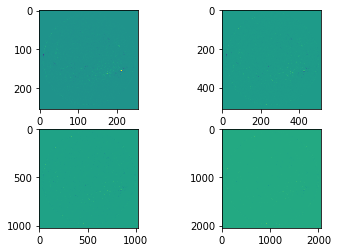

In [7]:
sizes = [256,512,1024,2048]
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(np.load(Xdata_dir + str(sizes[0]) + '/'+ os.listdir(Xdata_dir + str(sizes[0]))[0]))#final variable is image #
axarr[0,1].imshow(np.load(Xdata_dir + str(sizes[1]) + '/'+ os.listdir(Xdata_dir + str(sizes[1]))[0]))
axarr[1,0].imshow(np.load(Xdata_dir + str(sizes[2]) + '/'+ os.listdir(Xdata_dir + str(sizes[2]))[0]))
axarr[1,1].imshow(np.load(Xdata_dir + str(sizes[3]) + '/'+ os.listdir(Xdata_dir + str(sizes[3]))[0]))

## Create video given start, end, and image size

In [8]:
#create video function with (start,end,size)
def video(start,end,size):
    video_dir = Xdata_dir + str(size) + '/'
    array_filenames = os.listdir(video_dir)
    start_index = array_filenames.index(series.lower() + '.' + start.strftime('%Y%m%d'+'_'+'%H%M%S') + '_' + str(size) + '.npy')
    end_index = array_filenames.index(series.lower() + '.' + end.strftime('%Y%m%d'+'_'+'%H%M%S') + '_' + str(size) + '.npy')
    outputdata = np.zeros((end_index + 1 - start_index, size, size))
    index = 0
    for filename in array_filenames[start_index:end_index + 1]:
        outputdata[index,:,:] = np.load(video_dir + filename)
        index = index + 1
    skvideo.io.vwrite(video_dir + 'outputvideo_'+str(size) +'.mp4', outputdata)
sizes = [256,512,1024,2048]
for size in sizes:
    video(start,end,size)